<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="#Brand-name" data-toc-modified-id="Brand-name-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Brand name</a></span></li></ul></li><li><span><a href="#Featurization" data-toc-modified-id="Featurization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Featurization</a></span></li><li><span><a href="#AutoML-basic" data-toc-modified-id="AutoML-basic-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AutoML basic</a></span><ul class="toc-item"><li><span><a href="#Model-1" data-toc-modified-id="Model-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3:-hyper-removing-weaker-models" data-toc-modified-id="Model-3:-hyper-removing-weaker-models-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model 3: hyper removing weaker models</a></span></li><li><span><a href="#Model-4:-model-3-with-longer-hours" data-toc-modified-id="Model-4:-model-3-with-longer-hours-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model 4: model 3 with longer hours</a></span></li><li><span><a href="#Model-5:-specific-bag-folds-and-bag-sets-and-level-stacking" data-toc-modified-id="Model-5:-specific-bag-folds-and-bag-sets-and-level-stacking-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Model 5: specific bag folds and bag sets and level stacking</a></span><ul class="toc-item"><li><span><a href="#Sneak-peak-into-its-automatic-feature-generation" data-toc-modified-id="Sneak-peak-into-its-automatic-feature-generation-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Sneak peak into its automatic feature generation</a></span></li></ul></li><li><span><a href="#Model-6:-model-5-plus-HPO-(not-working)" data-toc-modified-id="Model-6:-model-5-plus-HPO-(not-working)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Model 6: model 5 plus HPO (not working)</a></span></li><li><span><a href="#Model-7:-TextPredictor-API-(GPU-required)" data-toc-modified-id="Model-7:-TextPredictor-API-(GPU-required)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Model 7: TextPredictor API (GPU required)</a></span></li><li><span><a href="#Model-8:-tabular-plus-images" data-toc-modified-id="Model-8:-tabular-plus-images-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Model 8: tabular plus images</a></span></li><li><span><a href="#Score-submission" data-toc-modified-id="Score-submission-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Score submission</a></span></li></ul></li><li><span><a href="#Submission-1:-simple-model-baseline" data-toc-modified-id="Submission-1:-simple-model-baseline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submission 1: simple model baseline</a></span><ul class="toc-item"><li><span><a href="#Submission" data-toc-modified-id="Submission-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Submission</a></span></li></ul></li><li><span><a href="#Submission-2:-simple-baseline-+-product-and-decription-boolean-feature" data-toc-modified-id="Submission-2:-simple-baseline-+-product-and-decription-boolean-feature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Submission 2: simple baseline + product and decription boolean feature</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Data Loading

In [86]:
train_df = pd.read_csv("./data/raw/training.csv")
eval_df = pd.read_csv("./data/raw/valid.csv")
test_df = pd.read_csv("./data/raw/test.csv")

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
train_df.head()

,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
0,9300000005528663,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,NaN,Zwart,NaN,...,unece.unit.CMT,NaN,NaN,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN
1,9200000084514785,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg
2,9200000061877999,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg
4,9200000063108509,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg


In [266]:
# try to download images

def download_image(df, subpath):

    sub_df = df[["GlobalID", "image_url"]]
    sub_df = sub_df[~sub_df.image_url.isnull()]
    pp = "./data/imgs/{}".format(subpath)
    os.makedirs(pp, exist_ok=True)
    for x,(gid, url) in sub_df.iterrows():
        print(url)
        os.system("curl {} --output '{}/{}.jpg'".format(url, pp, gid))
        


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
download_image(train_df, subpath="train")

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg
https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg
https://media.s-bol.com/q73zJR535GnD/168x132.jpg
https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg
https://media.s-bol.com/NLPGDo1Lq4pK/168x127.jpg
https://media.s-bol.com/pKOL9q6Dx2V/168x174.jpg
https://media.s-bol.com/ml3RWxWZEon/168x65.jpg
https://media.s-bol.com/q70oLyWnoVx7/168x115.jpg
https://media.s-bol.com/5qrgl7OYy6x/168x165.jpg
https://media.s-bol.com/2RGmXp705yQP/168x134.jpg
https://media.s-bol.com/7NZjPpkwr3w/168x98.jpg
https://media.s-bol.com/wMNKxG14KnM/168x31.jpg
https://media.s-bol.com/RWV2XkW8NPL/168x200.jpg
https://media.s-bol.com/RW9jl0BNO2q/168x87.jpg
https://media.s-bol.com/311WMj81EoGQ/168x130.jpg
https://media.s-bol.com/NNvKJNP8Gx6/50x210.jpg
https://media.s-bol.com/KO7wgmlAxvAM/168x125.jpg
https://media.s-bol.com/ANj8WRk6MVnj/168x80.jpg
https://media.s-bol.com/mZZ8q5ZkKkYA/126x210.jpg
https://media.s-bol.com/g1vZXDVOR06/168x195.jpg
https://media.s-bol.com/JLlM7GnopL2/14

https://media.s-bol.com/xP89VxBnV6B/163x210.jpg
https://media.s-bol.com/OkVDGxG0MWL/168x76.jpg
https://media.s-bol.com/79mlNPlElvGG/168x126.jpg
https://media.s-bol.com/MQ8NqlJkQQzA/168x171.jpg
https://media.s-bol.com/mZQGYZXoxG7E/118x210.jpg
https://media.s-bol.com/gLP1149gjNP6/168x140.jpg
https://media.s-bol.com/jZykx76Z5AJ5/168x69.jpg
https://media.s-bol.com/RWVJ5N986XO/168x203.jpg
https://media.s-bol.com/RRy4wXovrjR/168x149.jpg
https://media.s-bol.com/gZEQWAz7n7zk/168x76.jpg
https://media.s-bol.com/NkkJOkQQLY9m/168x167.jpg
https://media.s-bol.com/Yz8BKpjq7Wp/168x95.jpg
https://media.s-bol.com/Yo66KE72yRW/168x108.jpg
https://media.s-bol.com/YxjLO25VvYY/168x108.jpg
https://media.s-bol.com/mO5XxlD75619/168x141.jpg
https://media.s-bol.com/gJAzg6GP0OG3/168x77.jpg
https://media.s-bol.com/mZQ99gvJ490R/163x210.jpg
https://media.s-bol.com/DkNoBz8WEo15/168x117.jpg
https://media.s-bol.com/YEE5mDjPAljA/168x142.jpg
https://media.s-bol.com/mB93jp9DPE0/168x181.jpg
https://media.s-bol.com/J66Q7v7R1

https://media.s-bol.com/mZZgYmZGZGwA/168x101.jpg
https://media.s-bol.com/gzDlr0zLlGD/168x108.jpg
https://media.s-bol.com/79Zy1m5DYEry/124x210.jpg
https://media.s-bol.com/4g5PZOZr8D0/168x187.jpg
https://media.s-bol.com/xkGnDjROzQPz/168x167.jpg
https://media.s-bol.com/mA88p6J5KgE/163x210.jpg
https://media.s-bol.com/rJBYnm8qv8p/168x56.jpg
https://media.s-bol.com/xkkBmMZAklmJ/168x91.jpg
https://media.s-bol.com/R40vnRwmN1q/89x210.jpg
https://media.s-bol.com/mB95R2jV5Zr/168x165.jpg
https://media.s-bol.com/RWGAgzZ4GEY/110x210.jpg
https://media.s-bol.com/mlGKkoE2QNA/137x210.jpg
https://media.s-bol.com/Y4kWLN58QQO/168x127.jpg
https://media.s-bol.com/31MYk6g57R1p/168x168.jpg
https://media.s-bol.com/mZZkQVVrRBMG/144x210.jpg
https://media.s-bol.com/7j0zr12N85w/168x119.jpg
https://media.s-bol.com/mAmJGkm5KKp/168x190.jpg
https://media.s-bol.com/gJYxpv4XYZA6/168x40.jpg
https://media.s-bol.com/xkvpGlYRJrRJ/168x117.jpg
https://media.s-bol.com/g1BknX97W16/168x79.jpg
https://media.s-bol.com/mZZA1Q5v7Q00/

https://media.s-bol.com/rNZ4KVkK424/168x182.jpg
https://media.s-bol.com/xQzX153Goz3/168x127.jpg
https://media.s-bol.com/JVZ0rAqwv12/113x210.jpg
https://media.s-bol.com/BxO1BBNQ6Qo/168x118.jpg
https://media.s-bol.com/YvBg8r5W3QGW/168x191.jpg
https://media.s-bol.com/NP7BJyZKZo2/168x126.jpg
https://media.s-bol.com/3M5qPMDwKz9/168x120.jpg
https://media.s-bol.com/vK4yXkL29GL/168x160.jpg
https://media.s-bol.com/N9Zmo5N7M878/142x210.jpg
https://media.s-bol.com/xkqEYrlo1g8B/168x126.jpg
https://media.s-bol.com/RWjlqpqvDRY/160x210.jpg
https://media.s-bol.com/Nzqryzo36jN/168x120.jpg
https://media.s-bol.com/3B43ygBnNjQ/168x95.jpg
https://media.s-bol.com/qxxZgw3p6BPG/168x16.jpg
https://media.s-bol.com/JG4wMlz7YXg/168x158.jpg
https://media.s-bol.com/gJYO6WDV40Z3/168x24.jpg
https://media.s-bol.com/BxW9pnZQY2X/168x185.jpg
https://media.s-bol.com/BgngPJ026jgn/168x168.jpg
https://media.s-bol.com/xGnM9GjDpMmn/168x163.jpg
https://media.s-bol.com/xkq9pD12Xxpl/168x133.jpg
https://media.s-bol.com/JLQqrA9LoAJ

https://media.s-bol.com/NLBOvPE4Kwj8/168x180.jpg
https://media.s-bol.com/7vj08w06Omr/150x210.jpg
https://media.s-bol.com/7LZrryopwJGy/168x170.jpg
https://media.s-bol.com/BJwEkJwD5BN/168x167.jpg
https://media.s-bol.com/7L9Rl1LwKNpA/168x61.jpg
https://media.s-bol.com/JLQXnQnzlPo/153x210.jpg
https://media.s-bol.com/YEp5g3YjoJpK/160x210.jpg
https://media.s-bol.com/mQxpp0nk5rn0/168x126.jpg
https://media.s-bol.com/gZzV8VDLKoqr/168x128.jpg
https://media.s-bol.com/qj41JMQyZROD/168x66.jpg
https://media.s-bol.com/73RMrllG3nzB/168x165.jpg
https://media.s-bol.com/8PXxqRM3jKo/151x210.jpg
https://media.s-bol.com/imgbase0/imagebase3/regular/FC/3/9/6/5/9200000104295693.jpg
https://media.s-bol.com/mwlKB7DLLXYE/168x159.jpg
https://media.s-bol.com/x67AYBGwwMpr/168x169.jpg
https://media.s-bol.com/J6Zy6qqrJ8lo/168x92.jpg
https://media.s-bol.com/pAOkYMnQnY2/168x168.jpg
https://media.s-bol.com/mZRpB3nZWA7E/168x118.jpg
https://media.s-bol.com/BrQqJJYkR5kN/168x117.jpg
https://media.s-bol.com/mO0K0zBGLEjG/157x2

https://media.s-bol.com/g1180lZLYgG/153x210.jpg
https://media.s-bol.com/J6JWLDr1wZ3g/168x122.jpg
https://media.s-bol.com/NZNKj50NvAL/168x187.jpg
https://media.s-bol.com/R6oyvyOj084R/168x125.jpg
https://media.s-bol.com/OgY2wV2j8g4B/168x168.jpg
https://media.s-bol.com/mBrp83Bm76E/168x144.jpg
https://media.s-bol.com/KrXxOLr5KoXn/168x132.jpg
https://media.s-bol.com/mZr389qJ3n0R/157x210.jpg
https://media.s-bol.com/R66QkvXEJ2zK/168x164.jpg
https://media.s-bol.com/31RwMg51YmZp/168x168.jpg
https://media.s-bol.com/gJYyKzNnq2xZ/168x163.jpg
https://media.s-bol.com/J66Wmwkk7lxl/168x150.jpg
https://media.s-bol.com/ZD48zlYqDOE/168x127.jpg
https://media.s-bol.com/7jYpqyO7qmO/168x137.jpg
https://media.s-bol.com/N9jkKKO0q6KD/168x168.jpg
https://media.s-bol.com/YE9EvNwkngV2/168x154.jpg
https://media.s-bol.com/Yjg0XQLlJPO/168x104.jpg
https://media.s-bol.com/EDE2kN45lGv/168x104.jpg
https://media.s-bol.com/m6mN8V3LkgA/168x165.jpg
https://media.s-bol.com/NkJwXGv96K5m/168x66.jpg
https://media.s-bol.com/Jy2Oq

https://media.s-bol.com/mlLEY5qOXNA/168x164.jpg
https://media.s-bol.com/rkyA4PZ1jAnE/168x161.jpg
https://media.s-bol.com/RRkk6Ezp6DR/168x132.jpg
https://media.s-bol.com/x66ny70JNN9q/168x98.jpg
https://media.s-bol.com/34K88B5gz0n/156x210.jpg
https://media.s-bol.com/x6VXX13Z6Npl/168x76.jpg
https://media.s-bol.com/VOpJMk2NK7lW/156x210.jpg
https://media.s-bol.com/R2ZKRw8pPVY/155x210.jpg
https://media.s-bol.com/5j49qgGx3mK/161x210.jpg
https://media.s-bol.com/VAkwX3ABZANB/124x210.jpg
https://media.s-bol.com/R26KkP361rw/168x106.jpg
https://media.s-bol.com/Qk0g3YxAwpy5/168x71.jpg
https://media.s-bol.com/0Y5KjqVYZvjL/168x103.jpg
https://media.s-bol.com/gKBXMK0qGlD/168x164.jpg
https://media.s-bol.com/PR8VMgq27yw/84x210.jpg
https://media.s-bol.com/qjMJEROvjGor/168x125.jpg
https://media.s-bol.com/Y4o4VxkOM1O/168x73.jpg
https://media.s-bol.com/BzDW4Z3rk0N/168x70.jpg
https://media.s-bol.com/68z89On15ORV/168x171.jpg
https://media.s-bol.com/3BR9RYzjDP4/168x189.jpg
https://media.s-bol.com/gLojjDN6EVvZ/

https://media.s-bol.com/qgW050mpKyR/168x182.jpg
https://media.s-bol.com/N9VDr220EmW6/168x99.jpg
https://media.s-bol.com/7j4n0yqQP7O/168x89.jpg
https://media.s-bol.com/gvZk2V0onn9/168x114.jpg
https://media.s-bol.com/qP7LnNLQKL2/144x210.jpg
https://media.s-bol.com/rJ4JJ6oMZ8p/66x210.jpg
https://media.s-bol.com/y504VYWWqww/168x109.jpg
https://media.s-bol.com/qxx18nY0KQL2/167x210.jpg
https://media.s-bol.com/gLWWLkqL459Y/168x136.jpg
https://media.s-bol.com/O7qmE0GoRD1p/167x210.jpg
https://media.s-bol.com/36O2Z7o3qrVx/168x160.jpg
https://media.s-bol.com/mlNL2OKr6JE/168x26.jpg
https://media.s-bol.com/g56QjkEmXNVj/168x155.jpg
https://media.s-bol.com/NPvxq6q13PL/168x91.jpg
https://media.s-bol.com/Y2BJ4MqQD0K/168x125.jpg
https://media.s-bol.com/xQZ29MwOkJq/168x131.jpg
https://media.s-bol.com/7lOZYK1wv7r/168x175.jpg
https://media.s-bol.com/mQoJ3XlgoGDr/168x168.jpg
https://media.s-bol.com/NkDAxYV0K278/168x118.jpg
https://media.s-bol.com/gr8p8DWJpWl/168x121.jpg
https://media.s-bol.com/NQy9gjrzZJp/1

https://media.s-bol.com/AwVxyQo2qrp/168x167.jpg
https://media.s-bol.com/qGrzpgGRgY0/168x122.jpg
https://media.s-bol.com/gLyvZE8mJP0j/168x121.jpg
https://media.s-bol.com/gBlZN09MOor/168x42.jpg
https://media.s-bol.com/7lLZpMy2O1y/130x210.jpg
https://media.s-bol.com/NkxR6w3Wnk6K/69x210.jpg
https://media.s-bol.com/NxPAjxmxPv0p/168x168.jpg
https://media.s-bol.com/qwn3rqPDEWr/168x121.jpg
https://media.s-bol.com/76gNq9OBzJpA/168x167.jpg
https://media.s-bol.com/3oZE3Lq22Dp/168x155.jpg
https://media.s-bol.com/BNjBWqx340BN/168x198.jpg
https://media.s-bol.com/RRBlrqy6nPV/168x124.jpg
https://media.s-bol.com/gBYwpjzGr5r/168x102.jpg
https://media.s-bol.com/YE9EvNAJBKVM/168x125.jpg
https://media.s-bol.com/7vNWrgJWNwG/168x123.jpg
https://media.s-bol.com/RWQZ01LWyyR/168x112.jpg
https://media.s-bol.com/qYG2MVj61723/168x209.jpg
https://media.s-bol.com/xP8o919J0Gl/168x172.jpg
https://media.s-bol.com/JqYQ2JXJylvK/168x173.jpg
https://media.s-bol.com/oDGBNDlzkgY/168x29.jpg
https://media.s-bol.com/733NANgjqgR

https://media.s-bol.com/rJ3Vp5EQzQE/168x128.jpg
https://media.s-bol.com/qjJkAZW1ozr3/164x210.jpg
https://media.s-bol.com/Blxv7LBQ7O2/168x189.jpg
https://media.s-bol.com/836znz3R0m9g/168x126.jpg
https://media.s-bol.com/3oY6D11z5nA/168x78.jpg
https://media.s-bol.com/qYRkVLD9PWKr/168x174.jpg
https://media.s-bol.com/Yo6zoVkp1Op/87x210.jpg
https://media.s-bol.com/Nk95DJ5L4DMz/168x119.jpg
https://media.s-bol.com/7l27vQQGMw8/168x122.jpg
https://media.s-bol.com/OVJqwvon31p/168x126.jpg
https://media.s-bol.com/JyMvwMxr55jg/168x41.jpg
https://media.s-bol.com/gr9AGVGgOvZ/168x112.jpg
https://media.s-bol.com/YvvRJXwG4z7W/168x128.jpg
https://media.s-bol.com/gLx8q6XknAL6/168x50.jpg
https://media.s-bol.com/Y4L7E9Kl2L9/168x44.jpg
https://media.s-bol.com/NLJA4qyGWZND/168x163.jpg
https://media.s-bol.com/NQNWqADmp6v/168x51.jpg
https://media.s-bol.com/RRkkqZqBLVz/163x210.jpg
https://media.s-bol.com/73G30GXDY3mO/168x116.jpg
https://media.s-bol.com/NLAErmrRRGlN/168x168.jpg
https://media.s-bol.com/JZArV4PjvlVP

https://media.s-bol.com/E92yBKO5DnpW/168x168.jpg
https://media.s-bol.com/NAWY3RLAj3m/66x210.jpg
https://media.s-bol.com/mZQpDK8AxEqr/136x210.jpg
https://media.s-bol.com/pYjYQl5rrxD6/168x174.jpg
https://media.s-bol.com/7Lo8JnX6R16j/168x86.jpg
https://media.s-bol.com/qG6qjpWN3rp/168x76.jpg
https://media.s-bol.com/xZ2NvgRxJl3/168x168.jpg
https://media.s-bol.com/NP4j9RNDp0p/168x129.jpg
https://media.s-bol.com/NP9LzZ0OZRL/168x112.jpg
https://media.s-bol.com/gppQVjpR9DyG/157x210.jpg
https://media.s-bol.com/JyGEz5qVnZVJ/168x64.jpg
https://media.s-bol.com/Y4NmqAwY7x9/61x210.jpg
https://media.s-bol.com/mZwE2nwkD4gA/168x145.jpg
https://media.s-bol.com/3BZlqk3wzEM/157x210.jpg
https://media.s-bol.com/BxOOJ9rzO4Y/163x210.jpg
https://media.s-bol.com/grPWmBP51WZ/168x36.jpg
https://media.s-bol.com/3l9y6Zv829o9/137x210.jpg
https://media.s-bol.com/3B61yZLz9RR/168x126.jpg
https://media.s-bol.com/o25NrQwJGyWj/84x210.jpg
https://media.s-bol.com/vXzk7253QpM/168x134.jpg
https://media.s-bol.com/gJ5Vrp59rOgl/1

https://media.s-bol.com/mBOpnrL4xER/85x210.jpg
https://media.s-bol.com/R4qmXnA29yR/168x176.jpg
https://media.s-bol.com/NLmgy2VYyMqL/168x157.jpg
https://media.s-bol.com/Y4BLOk10L4n/168x64.jpg
https://media.s-bol.com/gJLyq48gX37k/168x100.jpg
https://media.s-bol.com/VLBBLOGDPK5/168x121.jpg
https://media.s-bol.com/qwjjM1GO37p/168x168.jpg
https://media.s-bol.com/7jYY8RE6ODA/168x185.jpg
https://media.s-bol.com/7jrqo50z2pB/168x34.jpg
https://media.s-bol.com/VOpElQWGMW99/168x117.jpg
https://media.s-bol.com/xk8QJKAq7xor/168x168.jpg
https://media.s-bol.com/7lQ757zJnEj/168x112.jpg
https://media.s-bol.com/JL1y0zOkMlD/168x87.jpg
https://media.s-bol.com/yQ98mBwDv2W/168x135.jpg
https://media.s-bol.com/R6Yk07jl6E9R/168x112.jpg
https://media.s-bol.com/nR9lAJMRGJ85/168x72.jpg
https://media.s-bol.com/Y70p8YKP7kKK/168x168.jpg
https://media.s-bol.com/J8ykkQjyQKm2/168x89.jpg
https://media.s-bol.com/BBBYKJKGzoYW/168x172.jpg
https://media.s-bol.com/J6qk4Dpm4Jxl/168x65.jpg
https://media.s-bol.com/grMPYRVkBkY/1

https://media.s-bol.com/mLjN29EP69R/168x184.jpg
https://media.s-bol.com/kyYJEr5zzv6/168x96.jpg
https://media.s-bol.com/733rvG4AMw88/168x178.jpg
https://media.s-bol.com/gJY5OrOAZk3Y/168x173.jpg
https://media.s-bol.com/oVK79MM2Q6vj/65x210.jpg
https://media.s-bol.com/BNRXR4rEjL5k/132x210.jpg
https://media.s-bol.com/3l31nrzXA19r/168x109.jpg
https://media.s-bol.com/mZRxgm10Rl00/156x210.jpg
https://media.s-bol.com/qJk1QjGMGBk/168x163.jpg
https://media.s-bol.com/mA8YArZGwAR/168x171.jpg
https://media.s-bol.com/NkxZ4N873QWN/168x31.jpg
https://media.s-bol.com/jqP77mX5RnAv/168x168.jpg
https://media.s-bol.com/mA8E7DPrRjG/168x33.jpg
https://media.s-bol.com/318oOonKBGKO/168x118.jpg
https://media.s-bol.com/3lzRoJEQlBwn/168x172.jpg
https://media.s-bol.com/Nkxo011DMvXL/168x111.jpg
https://media.s-bol.com/gZ178RxokgwG/168x97.jpg
https://media.s-bol.com/qGy3V2ErmY0/168x203.jpg
https://media.s-bol.com/7lBB8NDBm2A/168x106.jpg
https://media.s-bol.com/r5Q7522LpP2/168x196.jpg
https://media.s-bol.com/mQBk1R3o3

https://media.s-bol.com/jRN6QBKR95ER/168x96.jpg
https://media.s-bol.com/7l8KALJ66qw/168x84.jpg
https://media.s-bol.com/Yopw5yxPy2p/162x210.jpg
https://media.s-bol.com/r8MW1vByrW6W/168x102.jpg
https://media.s-bol.com/RlwNGYjpYO7R/168x71.jpg
https://media.s-bol.com/D2Pr87kqv1y/168x147.jpg
https://media.s-bol.com/mOBnADAGQYw0/168x70.jpg
https://media.s-bol.com/ZD9JEKLKpZw/68x210.jpg
https://media.s-bol.com/oVyDr417kBnL/168x173.jpg
https://media.s-bol.com/xkvnLVrZB7wl/138x210.jpg
https://media.s-bol.com/grqpwV6Yrk3/168x172.jpg
https://media.s-bol.com/BBmlR5WGGEDJ/168x168.jpg
https://media.s-bol.com/J60wnXxjBKMg/168x177.jpg
https://media.s-bol.com/qxx0mVw9xx80/168x114.jpg
https://media.s-bol.com/NPE5QRgpDDD/168x143.jpg
https://media.s-bol.com/7lz0A8VAl4B/168x121.jpg
https://media.s-bol.com/8PPz7woP2Ar/153x210.jpg
https://media.s-bol.com/7lBnEqVrDRO/96x210.jpg
https://media.s-bol.com/RWnqnoLnvLK/168x89.jpg
https://media.s-bol.com/Z5py21XzJ3g/168x125.jpg
https://media.s-bol.com/q77rMRj2gxmG/1

https://media.s-bol.com/3oRZQqzqRZM/168x181.jpg
https://media.s-bol.com/gr8movYBJj3/168x62.jpg
https://media.s-bol.com/Jyo3JVgW1goD/143x210.jpg
https://media.s-bol.com/JGqKOnP5WnJ/168x120.jpg
https://media.s-bol.com/nR0N80oXBpEP/168x186.jpg
https://media.s-bol.com/YEpP7WR2xz4n/168x118.jpg
https://media.s-bol.com/3BQpKBQ0B2O/168x167.jpg
https://media.s-bol.com/7vM364Y6qqQ/168x49.jpg
https://media.s-bol.com/2rPDNkv8y1W/168x85.jpg
https://media.s-bol.com/342Dq07yRZM/168x129.jpg
https://media.s-bol.com/Nx8yGzlmOVwN/168x69.jpg
https://media.s-bol.com/qJODrW7Apw0/168x126.jpg
https://media.s-bol.com/YWgXKWYyogJ2/168x144.jpg
https://media.s-bol.com/BBo0oVMVBNxW/168x192.jpg
https://media.s-bol.com/mB9mDXKDQ1E/86x210.jpg
https://media.s-bol.com/BNQA69PMV3NW/52x210.jpg
https://media.s-bol.com/mQ2O7LnkYXYE/168x146.jpg
https://media.s-bol.com/BxZMDM771z2/168x107.jpg
https://media.s-bol.com/K1M20J53JNxR/168x70.jpg
https://media.s-bol.com/RZj6mVlY60Y/168x67.jpg
https://media.s-bol.com/xkqEQ33KjBRJ/16

https://media.s-bol.com/738EK56xN3OG/168x154.jpg
https://media.s-bol.com/mOVyLApjGEn0/168x78.jpg
https://media.s-bol.com/NVZY0AQDOj6/70x210.jpg
https://media.s-bol.com/NQxXwwMvMj6/99x210.jpg
https://media.s-bol.com/mwJwpVG6OgzA/168x208.jpg
https://media.s-bol.com/3QpBYRMBg189/168x130.jpg
https://media.s-bol.com/NQWq3M83q6K/168x123.jpg
https://media.s-bol.com/Jy7KW01W8zrJ/131x210.jpg
https://media.s-bol.com/31qoyy9XV7lx/168x137.jpg
https://media.s-bol.com/gZgpx1rDZgGY/168x178.jpg
https://media.s-bol.com/lOx6QKNlvvq5/163x210.jpg
https://media.s-bol.com/mOOXXoP9xmyp/168x135.jpg
https://media.s-bol.com/JZYoKWZAK0lo/168x153.jpg
https://media.s-bol.com/RlwNqZ6JQ16E/168x123.jpg
https://media.s-bol.com/JG0MYyoMgxl/168x191.jpg
https://media.s-bol.com/3B43J21pVOr/168x68.jpg
https://media.s-bol.com/g5DAwvwO0n5k/168x173.jpg
https://media.s-bol.com/NN9VJ7ElkGL/168x122.jpg
https://media.s-bol.com/3l9PEoQ9Nk5M/168x154.jpg
https://media.s-bol.com/qJZk70n6nBG/168x95.jpg
https://media.s-bol.com/zO27KVXm

https://media.s-bol.com/mQLwKp1Mmpqr/139x210.jpg
https://media.s-bol.com/NOzEVWxVAJmD/168x98.jpg
https://media.s-bol.com/311OOEo42rQr/168x71.jpg
https://media.s-bol.com/gpg2OQowArKr/168x121.jpg
https://media.s-bol.com/311pgmEAGnq9/168x110.jpg
https://media.s-bol.com/mB7oEZyxvor/168x94.jpg
https://media.s-bol.com/NkD6EE3lkwML/168x108.jpg
https://media.s-bol.com/xkrkvwDr41MP/168x91.jpg
https://media.s-bol.com/qQ5mNZpoqoyR/162x210.jpg
https://media.s-bol.com/Yx2J13P8WKW/168x150.jpg
https://media.s-bol.com/xkq5K9K2YjN9/168x97.jpg
https://media.s-bol.com/gB15VkA8Z4Z/168x121.jpg
https://media.s-bol.com/Y6ojL9En2wGO/168x151.jpg
https://media.s-bol.com/366Xw20p2O4A/168x157.jpg
https://media.s-bol.com/JZn6DnP1KD12/168x175.jpg
https://media.s-bol.com/xkvoQyEJW54J/128x210.jpg
https://media.s-bol.com/8qE8OOlyM0ml/168x124.jpg
https://media.s-bol.com/mLLyXO1NBE0/168x125.jpg
https://media.s-bol.com/xkkRPBpyNE6J/168x138.jpg
https://media.s-bol.com/2nWDD5ozKXz/150x210.jpg
https://media.s-bol.com/j7p4rR

In [268]:
download_image(eval_df, subpath="valid")

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://media.s-bol.com/J6DpnJZrg2m2/168x121.jpg
https://media.s-bol.com/qJkqgEOAR23/168x155.jpg
https://media.s-bol.com/gZ6gAqE9xrDY/168x149.jpg
https://media.s-bol.com/KK3x9BExYBl/157x210.jpg
https://media.s-bol.com/gJJOlDqKzXyl/168x70.jpg
https://media.s-bol.com/mLwPWB5XkxE/168x142.jpg
https://media.s-bol.com/BBo7vMJR8kRJ/168x170.jpg
https://media.s-bol.com/NLRkM5DLPzOz/168x168.jpg
https://media.s-bol.com/YEpA4Dz9DWZn/168x37.jpg
https://media.s-bol.com/Bxv2qzko93J/168x73.jpg
https://media.s-bol.com/xnEvJwZExr19/168x113.jpg
https://media.s-bol.com/BzZ64VLzMWW/168x154.jpg
https://media.s-bol.com/NNN1NQBmpw6/136x210.jpg
https://media.s-bol.com/gv99J3BKVZ3/168x190.jpg
https://media.s-bol.com/mAr9p7WR7Vp/143x210.jpg
https://media.s-bol.com/NQON8Jyor1p/108x210.jpg
https://media.s-bol.com/jqKxXnBZjRRv/160x210.jpg
https://media.s-bol.com/NZX3NZjq8gm/168x182.jpg
https://media.s-bol.com/oV6ZnKYG7XRL/168x169.jpg
https://media.s-bol.com/gJl7pzX88DJG/168x168.jpg
https://media.s-bol.com/qx7xQjEzx

https://media.s-bol.com/RRwEXMNNKOK/168x111.jpg
https://media.s-bol.com/348B2Nq1q2n/168x164.jpg
https://media.s-bol.com/BLVpE7qO6EGN/168x116.jpg
https://media.s-bol.com/Rl5Xk9LMmxAL/168x194.jpg
https://media.s-bol.com/YOGJNPpqDDO/168x120.jpg
https://media.s-bol.com/mqw7L87lOn0R/110x210.jpg
https://media.s-bol.com/xv6g61PP75mn/168x117.jpg
https://media.s-bol.com/7Eprp8oME91/168x158.jpg
https://media.s-bol.com/gJZJZD6zjwnr/168x72.jpg
https://media.s-bol.com/xn74pyD8Kv9q/168x130.jpg
https://media.s-bol.com/qxxNj7ZjGvL2/152x210.jpg
https://media.s-bol.com/NLyoVm01ooYN/168x177.jpg
https://media.s-bol.com/BKmnyZ83Q4x/168x118.jpg
https://media.s-bol.com/4xxVnRM33Dm2/168x122.jpg
https://media.s-bol.com/qPRxGRo0Qkp/168x126.jpg
https://media.s-bol.com/qxqXq6xGMgj2/168x168.jpg
https://media.s-bol.com/BBB4ArNVMnRJ/168x147.jpg
https://media.s-bol.com/OyGPY1E6KKYN/168x115.jpg
https://media.s-bol.com/mZZ5ZPvg5BmG/168x201.jpg
https://media.s-bol.com/qrG8Y5G4lQ7/168x88.jpg
https://media.s-bol.com/NPmxj

https://media.s-bol.com/Vr8o2D8MkMo/125x210.jpg
https://media.s-bol.com/34E6EPwjX1M/168x123.jpg
https://media.s-bol.com/xQop0QqEZlq/168x61.jpg
https://media.s-bol.com/R42xnJ02vpR/168x34.jpg
https://media.s-bol.com/7NzQwNpllZA/168x135.jpg
https://media.s-bol.com/736nrMlWjLq1/168x74.jpg
https://media.s-bol.com/JyJmV0ZDA17l/168x180.jpg
https://media.s-bol.com/xvYMwogJJYK9/120x210.jpg
https://media.s-bol.com/BBo0gr7mjYxW/168x132.jpg
https://media.s-bol.com/xkqoQoWvjGj9/78x210.jpg
https://media.s-bol.com/ERVR8QY8782v/168x132.jpg
https://media.s-bol.com/NL9ELmWv9pNv/168x66.jpg
https://media.s-bol.com/7vGBEBWy2JO/168x104.jpg
https://media.s-bol.com/qjwG8MQ0GOoy/168x169.jpg
https://media.s-bol.com/YEW5GMj6gJN9/157x210.jpg
https://media.s-bol.com/qj2vrBrKQQ10/168x150.jpg
https://media.s-bol.com/311rMr0Z8AZM/168x167.jpg
https://media.s-bol.com/v2p2or4KKEMm/168x118.jpg
https://media.s-bol.com/3o1GQWKzwpA/168x201.jpg
https://media.s-bol.com/k2m55ykg8zOX/168x147.jpg
https://media.s-bol.com/q7zkEA9B

https://media.s-bol.com/gZZY3kYBJ2WZ/153x210.jpg
https://media.s-bol.com/r8ygBDo3XZpW/168x67.jpg
https://media.s-bol.com/xGzpXQB6WB4n/168x172.jpg
https://media.s-bol.com/qxRRp367qk67/168x203.jpg
https://media.s-bol.com/JJ1JlAz2L59/168x208.jpg
https://media.s-bol.com/xQ2L2qyMgK9/168x172.jpg
https://media.s-bol.com/qGnG30mL09y/168x125.jpg
https://media.s-bol.com/YErY1Y73kLz9/168x174.jpg
https://media.s-bol.com/Nkx7gDz9BVLv/168x177.jpg
https://media.s-bol.com/Dk0Nw4qmVMRx/168x178.jpg
https://media.s-bol.com/vQVvDljxwKDg/168x104.jpg
https://media.s-bol.com/qw2lRJBJJB2/168x152.jpg
https://media.s-bol.com/Z66R1ZXzVxoJ/168x105.jpg
https://media.s-bol.com/xZrO759n56n/168x93.jpg
https://media.s-bol.com/mByoKvpXWPn/162x210.jpg
https://media.s-bol.com/YW0DWnOVPp9K/168x140.jpg
https://media.s-bol.com/grrjm2xBwPG/168x139.jpg
https://media.s-bol.com/Y2OMP7RXz6M/168x201.jpg
https://media.s-bol.com/16QLlNP1Q93R/168x116.jpg
https://media.s-bol.com/qwnBoL29Vx7/168x160.jpg
https://media.s-bol.com/JJzNLEl

In [269]:
download_image(test_df, subpath="test")

https://media.s-bol.com/7Q5x2K6q6B8/168x120.jpg
https://media.s-bol.com/l5JOX7E2VPRg/168x141.jpg


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://media.s-bol.com/3lBKX9lqgEpR/168x66.jpg
https://media.s-bol.com/mZZrZjy75BOR/142x210.jpg
https://media.s-bol.com/L9V98wWQnBjA/168x82.jpg
https://media.s-bol.com/JLlvO6V4G6v/168x102.jpg
https://media.s-bol.com/mQ6VXQKVq6Y9/168x168.jpg
https://media.s-bol.com/VLBDK47LDXv/168x120.jpg
https://media.s-bol.com/gp4ZYrJ6pQ4G/168x95.jpg
https://media.s-bol.com/jZRN2yyJJmO4/168x168.jpg
https://media.s-bol.com/mZQMx3NzEl00/168x138.jpg
https://media.s-bol.com/gZrz0O4o7NY3/168x187.jpg
https://media.s-bol.com/8xAEVp0Kgg3/168x150.jpg
https://media.s-bol.com/qGnElzBBnV7/168x112.jpg
https://media.s-bol.com/qJlLBr28J80/162x210.jpg
https://media.s-bol.com/YEER4XpXpp7O/168x168.jpg
https://media.s-bol.com/R6YGg6KWV1YK/168x127.jpg
https://media.s-bol.com/NkDqjDqYYB2v/101x210.jpg
https://media.s-bol.com/r8KvJJRRPkk2/168x69.jpg
https://media.s-bol.com/Bx9p8PDyxDQ/168x125.jpg
https://media.s-bol.com/D19G6LM1zm5A/168x179.jpg
https://media.s-bol.com/R66YwB5ENmow/168x85.jpg
https://media.s-bol.com/YEpZZKO

https://media.s-bol.com/ZylvnYnXKQ2/168x106.jpg
https://media.s-bol.com/m6AzDJjXkYA/168x161.jpg
https://media.s-bol.com/Br28XOEr7MoW/157x210.jpg
https://media.s-bol.com/BBkk0A1r0KyN/168x94.jpg
https://media.s-bol.com/D1jGoEr88JOK/168x170.jpg
https://media.s-bol.com/YE6MNQm134XA/136x210.jpg
https://media.s-bol.com/NLgo1nZGM3l8/168x160.jpg
https://media.s-bol.com/xP8235nMPP3/168x117.jpg
https://media.s-bol.com/qG66LQqBQqD/168x79.jpg
https://media.s-bol.com/BrvELjmA4QAJ/168x104.jpg
https://media.s-bol.com/31MyKBwNozLn/168x178.jpg
https://media.s-bol.com/EvN1pV00KKN/90x210.jpg
https://media.s-bol.com/jRVlQZQNGQ64/168x168.jpg
https://media.s-bol.com/BNMqyqQ9A3Pn/168x168.jpg
https://media.s-bol.com/BK3K6EoolDJ/168x47.jpg
https://media.s-bol.com/NQOrpgXKlRL/168x25.jpg
https://media.s-bol.com/qxxVYvJDRmVr/168x84.jpg
https://media.s-bol.com/mQoop5Vl9Y2n/168x102.jpg
https://media.s-bol.com/o25Nrv3q3NrK/168x190.jpg
https://media.s-bol.com/JqRGGw9xkKQ2/168x174.jpg
https://media.s-bol.com/owqBkw5kp

https://media.s-bol.com/NkDmZGy3KPGL/168x131.jpg
https://media.s-bol.com/mZR4OADZgqmG/168x120.jpg
https://media.s-bol.com/qP0PljN95Dp/168x180.jpg
https://media.s-bol.com/Bx5zqNVVvJW/168x106.jpg
https://media.s-bol.com/mKKQlQ1yo69/168x76.jpg
https://media.s-bol.com/7lBBn7ArPQG/168x125.jpg
https://media.s-bol.com/Bz9XkL5GYDQ/106x210.jpg
https://media.s-bol.com/WkoD3Yw2O6X/168x108.jpg
https://media.s-bol.com/jRQ1JMMZ6XLB/168x136.jpg
https://media.s-bol.com/738roJGGnPxB/168x92.jpg
https://media.s-bol.com/JJ4WL5ryk7l/168x143.jpg
https://media.s-bol.com/RoLx8Dk5wxQ0/168x182.jpg
https://media.s-bol.com/NxzmMPKDjM1m/168x134.jpg
https://media.s-bol.com/36KrkW0PwOKn/168x117.jpg
https://media.s-bol.com/l5OG5LL2MPzV/89x210.jpg
https://media.s-bol.com/gZMZV8YrjXxZ/168x141.jpg
https://media.s-bol.com/LgK2ZWDJDKRp/145x210.jpg
https://media.s-bol.com/JpvOQ9zM8go/168x170.jpg
https://media.s-bol.com/BVW8Pow10BN/168x138.jpg
https://media.s-bol.com/Y7Gv1wqgBgX0/168x119.jpg
https://media.s-bol.com/imgbase0

https://media.s-bol.com/gZLgjGzqz1B9/168x112.jpg
https://media.s-bol.com/rQ5Yp8K94VE/30x210.jpg
https://media.s-bol.com/mqkGvoXjmN03/168x139.jpg
https://media.s-bol.com/3l1pvW025AE9/112x210.jpg
https://media.s-bol.com/9rKxwQV33RgZ/113x210.jpg
https://media.s-bol.com/xQDWoxYlnnz/168x168.jpg
https://media.s-bol.com/qxYE7y4ZLxo7/168x124.jpg
https://media.s-bol.com/JypOxX0O9qky/168x168.jpg
https://media.s-bol.com/7lVOg9L4Omr/168x121.jpg
https://media.s-bol.com/JLkBBl2AZVJ/168x168.jpg
https://media.s-bol.com/qxR4YyEo03RR/168x156.jpg
https://media.s-bol.com/4EZvAEAo076/168x122.jpg
https://media.s-bol.com/4xmBwl71wgqx/168x122.jpg
https://media.s-bol.com/BBYBLmorLoAJ/168x86.jpg
https://media.s-bol.com/mZZMy3Rm3Z5p/168x164.jpg
https://media.s-bol.com/gv3Rp7mzPO6/168x146.jpg
https://media.s-bol.com/JqY4KjK3N4N9/63x210.jpg
https://media.s-bol.com/xkjvnLyXxB3q/168x94.jpg
https://media.s-bol.com/73LW3BvzoGy8/168x125.jpg
https://media.s-bol.com/R6gPADwGZGQ0/150x210.jpg
https://media.s-bol.com/q5P8ME

# Exploration
- LabelName is all null, drop it; GlobalId has no value, drop it. Ingredients is also all null
- MaterialDescription has only 1 value, which is not useful;
- NumberOfPieces has 3 values, not useful


In [22]:
train_df.head()

,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
0,9300000005528663,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,NaN,Zwart,NaN,...,unece.unit.CMT,NaN,NaN,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN
1,9200000084514785,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg
2,9200000061877999,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg
4,9200000063108509,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg


In [19]:
pos_train_df = train_df[train_df.Unwanted == "Y"]
neg_train_df = train_df[train_df.Unwanted == "N"]
print("num of postive examples:", len(pos_train_df))
print("num of negative examples:", len(neg_train_df))

num of postive examples: 1484
num of negative examples: 1484


In [41]:
train_df.columns

Index(['GlobalID', 'Unwanted', 'ProductTitleNL', 'ProductDescriptionNL',
       'BrickName', 'ChunkName', 'BrandName', 'LabelName', 'Colour',
       'Ingredients', 'Material', 'MaterialDescription', 'NumberOfPieces',
       'NumberOfProductsInPackage', 'PackageHeight', 'PackageHeightUnit',
       'PackageLength', 'PackageLengthUnit', 'PackageWeight',
       'PackageWeightUnit', 'PackageWidth', 'PackageWidthUnit',
       'ProductHeight', 'ProductHeightUnit', 'ProductLength',
       'ProductLengthUnit', 'ProductWeight', 'ProductWeightUnit',
       'ProductWidth', 'ProductWidthUnit', 'image_url'],
      dtype='object')

In [106]:
temp = train_df[train_df.ProductTitleNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)

N    42
Y    19
Name: Unwanted, dtype: int64


0.6885245901639344

In [107]:
temp = train_df[train_df.ProductDescriptionNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)

N    80
Y    28
Name: Unwanted, dtype: int64


0.7407407407407407

In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GlobalID                   2968 non-null   int64  
 1   Unwanted                   2968 non-null   object 
 2   ProductTitleNL             2907 non-null   object 
 3   ProductDescriptionNL       2860 non-null   object 
 4   BrickName                  2968 non-null   object 
 5   ChunkName                  2968 non-null   object 
 6   BrandName                  2812 non-null   object 
 7   LabelName                  0 non-null      float64
 8   Colour                     2249 non-null   object 
 9   Ingredients                0 non-null      float64
 10  Material                   1881 non-null   object 
 11  MaterialDescription        1 non-null      object 
 12  NumberOfPieces             3 non-null      float64
 13  NumberOfProductsInPackage  116 non-null    float

In [125]:
train_df[(~train_df.NumberOfProductsInPackage.isnull())]

,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg
6,9200000108576944,N,PULUZ Digitale camera Batterij-oplader voor Ca...,"<p> 1. Met het ontwerp van autoadapter, de inp...",Opladers,Batterijoplader,Merkloos / Sans marque,NaN,Geen,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/pKOL9q6Dx2V/168x174.jpg
17,9200000113114016,N,"Oplader voor Dewalt, NiMH/ Ni-Cd","Geschikt voor:<br /><br />DEWALT<br />DC390N, ...",Opladers,Batterijoplader,Wholeshare,NaN,Zwart,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/311WMj81EoGQ/168x130.jpg
29,9200000075946655,N,Blauwe asbak met pluizenbol bloem,Blauwe asbak met pluizenbol bloem. Deze asbak ...,Rookaccessoires,Accessoire voor sigaretten,Merkloos / Sans marque,NaN,Blauw,NaN,...,NaN,7.0,unece.unit.CMT,7.0,unece.unit.CMT,NaN,NaN,11.0,unece.unit.CMT,https://media.s-bol.com/J6q7624K6rgK/168x117.jpg
50,9200000069987537,N,GP Powerbank Batterylader + 4x AA 2700 mAh,- 2-5 uur snellader<br />- Netvoedingadapter 1...,Opladers,Batterijoplader,Merkloos / Sans marque,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gAmjPzYnLjY/168x149.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,9200000051934494,N,Audi Zakmes,Audi zakmes roestvrij staal met zwarte bies. F...,Hobbymessen (Niet-elektrisch),Zakmes,Audi,NaN,NaN,NaN,...,NaN,2.5,unece.unit.CMT,9.0,unece.unit.CMT,NaN,NaN,2.5,unece.unit.CMT,https://media.s-bol.com/BBLLNKE9rqjn/168x143.jpg
2880,9200000122034220,N,Universele telefoon batterij oplader – Rood,Specificaties<br /><br />Geschikt Voor<br />El...,Opladers,Batterijoplader,Merkloos / Sans marque,NaN,Rood,NaN,...,unece.unit.CMT,25.0,unece.unit.CMT,15.0,unece.unit.CMT,NaN,NaN,15.0,unece.unit.CMT,https://media.s-bol.com/xkNJMRGB8YZr/108x210.jpg
2889,9200000104590776,Y,USB oplader voor elektrische sigaret - vape ch...,elektrische sigaret - vape charger - oplaadkab...,Opladers,Batterijoplader,Merk onbekend,NaN,zwart,NaN,...,unece.unit.MMT,NaN,NaN,20.0,unece.unit.CMT,NaN,NaN,NaN,NaN,https://media.s-bol.com/qwMz93RjB97/168x171.jpg
2891,9200000065714469,N,Kleurrijke asbak groen 11 cm,Kleurrijke asbak groen. Deze gekleurde asbak m...,Rookaccessoires,Accessoire voor sigaretten,Bellatio,NaN,Groen,NaN,...,NaN,7.0,unece.unit.CMT,11.0,unece.unit.CMT,NaN,NaN,11.0,unece.unit.CMT,https://media.s-bol.com/mBWoBvojlQG/168x140.jpg


In [146]:
neg_train_df.ProductDescriptionNL

1                      Jacob Hooy Valeriaanwortel gemalen
3       Kabel om een iPhone, iPad of iPod te verbinden...
6       <p> 1. Met het ontwerp van autoadapter, de inp...
7       EMBLEEM 3D PVC TIREUR D'ELITE GROEN  11128<br ...
12                                   Leif Plopper vangnet
                              ...                        
2962    100 levels statische correctie + 100 levels vi...
2963    Met de IGGI Pocket Multi Tool op zak heb je al...
2964    <h3><strong>Broomer Anti Blaf Apparaat tegen i...
2966    Deze sigarettenroller voor 8 cm maat sigaret t...
2967    Deze anti blafband stopt overmatig blaffen d.m...
Name: ProductDescriptionNL, Length: 1484, dtype: object

<AxesSubplot:>

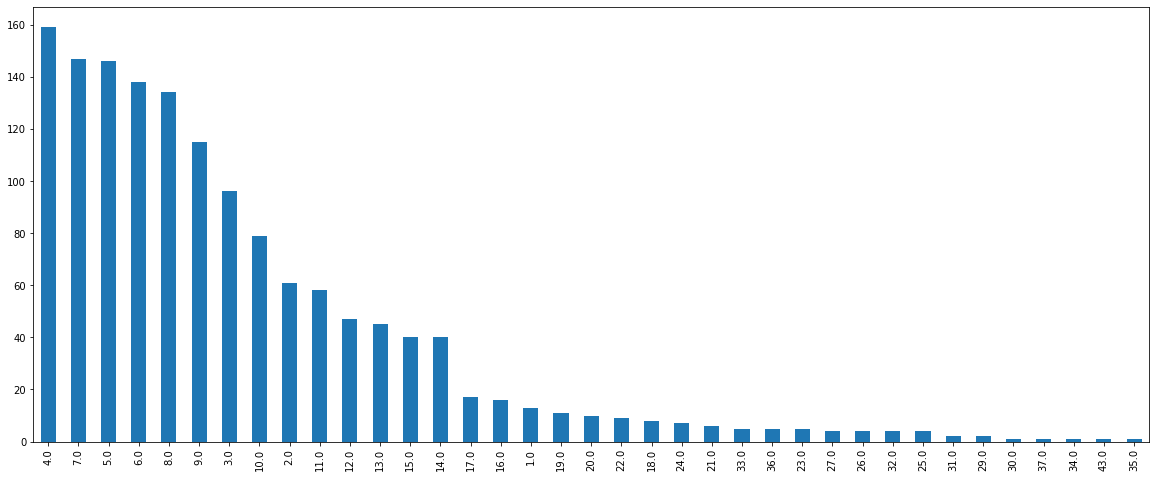

In [165]:
fig = plt.figure(figsize=(20,8))

neg_train_df.ProductTitleNL.str.split().str.len().value_counts().plot(kind="bar")

<AxesSubplot:>

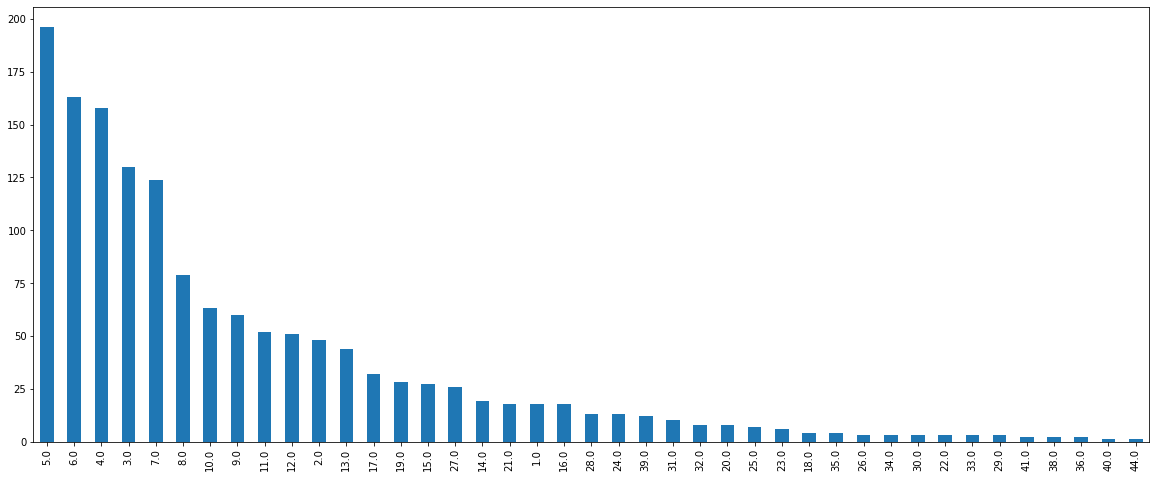

In [164]:
fig = plt.figure(figsize=(20,8))

pos_train_df.ProductTitleNL.str.split().str.len().value_counts().plot(kind="bar")

In [161]:
neg_train_df.ProductTitleNL.str.split().str.len().sort_values().head(20)

122     1.0
2430    1.0
2942    1.0
2435    1.0
868     1.0
701     1.0
873     1.0
1113    1.0
1216    1.0
207     1.0
2336    1.0
1101    1.0
2276    1.0
1957    2.0
1956    2.0
1404    2.0
2630    2.0
197     2.0
2778    2.0
1328    2.0
Name: ProductTitleNL, dtype: float64

In [162]:
pos_train_df.ProductTitleNL

0                                      Luxe Ginder- Zwart
2                              SOG Bladelight Fixed Blade
4                             Cold Steel Two Handed Latin
5       Joint Roller 110mm | Sigaretten Roller Machine...
8                 Casstrom Woodsman Bog Oak met Firesteel
                              ...                        
2954                Mushroom Fairy - Rookpijp - Rook Pijp
2958          Casstrom Woodsman Curly Birch met Firesteel
2959    ✅ Cigar Box | Luxury | Luxe | Sigarendoos | Ro...
2960                                XL- luxe Ginder- Rood
2965    Cyclones Hemp Cones Red Alert (24pcs/display) ...
Name: ProductTitleNL, Length: 1484, dtype: object

In [160]:
pos_train_df.ProductTitleNL.str.split().str.len().sort_values().head(20)

1050    1.0
2636    1.0
1782    1.0
1394    1.0
1725    1.0
1414    1.0
875     1.0
1270    1.0
799     1.0
824     1.0
2266    1.0
595     1.0
2248    1.0
510     1.0
1493    1.0
2951    1.0
712     1.0
2394    1.0
1756    2.0
1750    2.0
Name: ProductTitleNL, dtype: float64

50.0     37
17.0     36
96.0     32
97.0     30
8.0      27
         ..
137.0     1
258.0     1
459.0     1
179.0     1
486.0     1
Name: ProductDescriptionNL, Length: 306, dtype: int64

In [137]:
pos_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 0 to 2965
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GlobalID                   1484 non-null   int64  
 1   Unwanted                   1484 non-null   object 
 2   ProductTitleNL             1465 non-null   object 
 3   ProductDescriptionNL       1456 non-null   object 
 4   BrickName                  1484 non-null   object 
 5   ChunkName                  1484 non-null   object 
 6   BrandName                  1441 non-null   object 
 7   LabelName                  0 non-null      float64
 8   Colour                     1184 non-null   object 
 9   Ingredients                0 non-null      float64
 10  Material                   981 non-null    object 
 11  MaterialDescription        0 non-null      object 
 12  NumberOfPieces             0 non-null      float64
 13  NumberOfProductsInPackage  13 non-null     float

In [121]:
print(train_df.NumberOfProductsInPackage.describe())
train_df.NumberOfProductsInPackage.value_counts()

count    116.000000
mean       5.155172
std       44.472093
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      480.000000
Name: NumberOfProductsInPackage, dtype: float64


1.0      113
480.0      1
2.0        1
3.0        1
Name: NumberOfProductsInPackage, dtype: int64

In [20]:
# there are rows without image
df_no_image = train_df[train_df["image_url"].isnull()]
count_wanted = df_no_image[df_no_image.Unwanted == "Y"].shape[0]
count_unwanted = df_no_image[df_no_image.Unwanted == "N"].shape[0]
print("unwanted percent in product without image:",(count_unwanted)/(count_unwanted+ count_wanted) )

unwanted percent in product without image: 0.7107843137254902


## Brand name

- There is a similar distribution of unwanted products in pos and neg products

<AxesSubplot:>

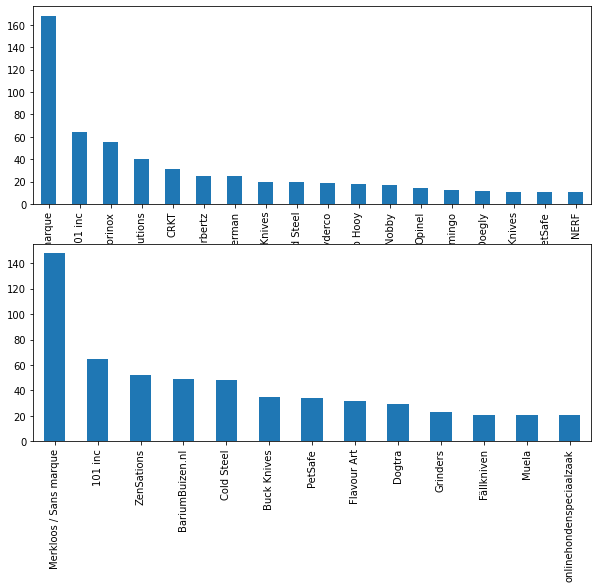

In [77]:
# let's look at the value count for each brand
fig = plt.figure(figsize=(10,8))
ax = fig.subplots(2)
brand_name_val_count = neg_train_df.BrandName.value_counts()
brand_name_val_count = brand_name_val_count[brand_name_val_count > 10]
brand_name_val_count.plot(kind='bar', ax = ax[0]);

brand_name_val_count = pos_train_df.BrandName.value_counts()
brand_name_val_count = brand_name_val_count[brand_name_val_count > 20]
brand_name_val_count.plot(kind='bar',ax = ax[1])

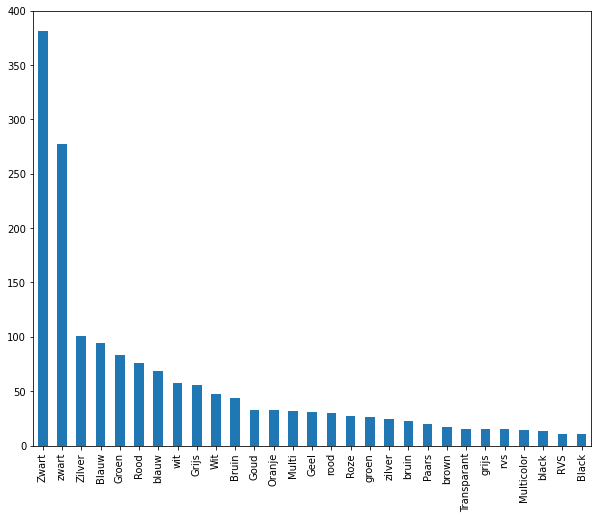

In [91]:
fig = plt.figure(figsize=(10,8))
ax = fig.subplots()
brand_name_val_count = train_df.Colour.value_counts()
brand_name_val_count = brand_name_val_count[brand_name_val_count > 10]
brand_name_val_count.plot(kind='bar', ax = ax);

In [108]:
# let's look at brand name
temp = train_df[train_df.Material.isnull()]
temp.Unwanted.value_counts()

N    584
Y    503
Name: Unwanted, dtype: int64

Summary
- There are many unwanted products in products without desc or title or image url, this can be a good signal

# Featurization

In [94]:
# - LabelName is all null, drop it; GlobalId has no value, drop it. Ingredients is also all null
# - MaterialDescription has only 1 value, which is not useful;
# - NumberOfPieces has 3 values, not useful
def drop_columns(df):
    df_local = df.copy(deep=True)
    cols_drop = ["GlobalID", "LabelName", "Ingredients", "MaterialDescription", "NumberOfPieces"]
    df_local = df_local.drop(cols_drop,axis=1)
    return df_local


def add_binary_feature(df):
    df_local = df.copy(deep=True)
    # if the feature is null, then 0, otherwise 1
    df_local["hasTitle"] = np.where(df_local['ProductTitleNL'].isnull(), 0, 1)
    df_local["hasDesc"] = np.where(df_local['ProductDescriptionNL'].isnull(), 0, 1)
    df_local["has_image_url"] = np.where(df_local['image_url'].isnull(), 0, 1)
    return df_local

def add_image_path(df,subpath):
    df_local = df.copy(deep=True)
    df_local = df_local[~df_local.image_url.isnull()]
    
    df_local["image"] = df_local.apply(lambda row: "data/imgs/{}/".format(subpath)+str(row.GlobalID)+".jpg",
                                            axis=1)
    df_local = df_local[df_local.apply(lambda row: os.path.exists(row.image),axis=1)]
    if "Unwanted" in df_local.columns:
        df_local["label"] = df_local["Unwanted"]
    return df_local

def featurize(df,subpath):
    _df = df.copy(deep=True)
#     _df = add_image_path(_df,subpath)
    # drop columns
    _df = drop_columns(_df)
    _df = add_binary_feature(_df)
    return _df
    

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
import os
os.path.exists("data/imgs/train/1004004006942311.jpg")

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

In [99]:
x = add_image_path(test_df, "test")
x.to_csv("./data/processed/test.csv", index=False)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
bad_images = []
import cv2 as cv
import os

for root, dirs, files in os.walk(root, topdown=True):
    for filename in files:
        # 验证图像格式
        img = cv.imread(os.path.join(root, filename))
        if img is None:
            print(filename)
            os.remove(os.path.join(root, filename))
            bad_images.append(filename)
print("done.")

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9200000071356602.jpg
9200000078793548.jpg
done.


# AutoML basic

In [5]:
import autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [33]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset("./data/raw/training.csv")
valid_data = TabularDataset("./data/raw/valid.csv")
test_data = TabularDataset("./data/raw/test.csv")
train_data.head()

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: ./data/raw/training.csv | Columns = 31 / 31 | Rows = 2968 -> 2968
Loaded data from: ./data/raw/valid.csv | Columns = 30 / 30 | Rows = 638 -> 638
Loaded data from: ./data/raw/test.csv | Columns = 30 / 30 | Rows = 652 -> 652


,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
0,9300000005528663,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,NaN,Zwart,NaN,...,unece.unit.CMT,NaN,NaN,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN
1,9200000084514785,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg
2,9200000061877999,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg
4,9200000063108509,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg


In [34]:
train_data = featurize(train_data, "train")
valid_data = featurize(valid_data,"valid")
test_data = featurize(test_data, "test")
train_data.head()

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,Colour,Material,NumberOfProductsInPackage,PackageHeight,...,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url,image_path,hasTitle,hasDesc,has_image_url
0,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,Zwart,Metaal,NaN,3.2,...,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN,./data/imgs/train/9300000005528663.jpg,1,1,0
1,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,Wit,Katoen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg,./data/imgs/train/9200000084514785.jpg,1,1,1
2,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg,./data/imgs/train/9200000061877999.jpg,1,1,1
3,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,Wit,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg,./data/imgs/train/9300000004165840.jpg,1,1,1
4,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg,./data/imgs/train/9200000063108509.jpg,1,1,1


## Model 1

In [190]:
save_path = 'model-1-local-basic-feature'  # specifies folder to store trained models
predictor = TabularPredictor(label="Unwanted", path=save_path).fit(train_data)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "models-local-basic-feature/"
AutoGluon Version:  0.2.0
Train Data Rows:    2968
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Y', 'N']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary class

## Model 2

In [211]:
save_path = 'model-2-local-basic-feature'  # specifies folder to store trained models
predictor2 = TabularPredictor(label="Unwanted", path=save_path).fit(train_data, time_limit=60*10)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "model-2-local-basic-feature/"
AutoGluon Version:  0.2.0
Train Data Rows:    2968
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Y', 'N']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary clas

In [215]:
predictor2.leaderboard(silent=True)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.902,1.776707,56.336414,0.001922,0.848720,2,True,14
1,LightGBMLarge,0.888,0.075483,9.660550,0.075483,9.660550,1,True,13
2,LightGBMXT,0.878,0.078169,4.096458,0.078169,4.096458,1,True,3
3,ExtraTreesEntr,0.878,0.123495,2.810663,0.123495,2.810663,1,True,9
4,XGBoost,0.874,0.047205,7.565975,0.047205,7.565975,1,True,11
5,LightGBM,0.872,0.063806,3.309884,0.063806,3.309884,1,True,4
6,NeuralNetFastAI,0.872,0.589037,21.270797,0.589037,21.270797,1,True,10
7,RandomForestEntr,0.866,0.121954,2.356310,0.121954,2.356310,1,True,6
8,CatBoost,0.864,0.087307,10.730798,0.087307,10.730798,1,True,7
9,RandomForestGini,0.864,0.122991,2.212683,0.122991,2.212683,1,True,5


## Model 3: hyper removing weaker models

In [218]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
deafault_hp_config = get_hyperparameter_config("default")
# remove NN and KNN which are not performing well
my_hp = deafault_hp_config.copy()
my_hp.pop("NN")
my_hp.pop("KNN")
my_hp

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'mse',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'mse',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}]}

In [209]:
save_path = 'model-3-local-basic-feature'  # specifies folder to store trained models
predictor3 = TabularPredictor(label="Unwanted", path=save_path).fit(train_data, time_limit=60*10,
                                                                   hyperparameters=deafault_hp_config)
predictor3.leaderboard(silent=True)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "model-3-local-basic-feature/"
AutoGluon Version:  0.2.0
Train Data Rows:    2968
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Y', 'N']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary clas

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.892,0.821815,47.551145,0.001468,0.741199,2,True,11
1,LightGBMLarge,0.886,0.062926,7.985674,0.062926,7.985674,1,True,10
2,LightGBM,0.880,0.063898,3.180908,0.063898,3.180908,1,True,2
3,ExtraTreesEntr,0.878,0.124324,2.379588,0.124324,2.379588,1,True,7
4,ExtraTreesGini,0.870,0.124177,2.405507,0.124177,2.405507,1,True,6
5,XGBoost,0.868,0.050302,11.154209,0.050302,11.154209,1,True,9
6,CatBoost,0.868,0.081730,11.357736,0.081730,11.357736,1,True,5
7,LightGBMXT,0.866,0.065336,3.911738,0.065336,3.911738,1,True,1
8,RandomForestEntr,0.866,0.124289,2.262258,0.124289,2.262258,1,True,4
9,NeuralNetFastAI,0.862,0.545299,21.891217,0.545299,21.891217,1,True,8


## Model 4: model 3 with longer hours

In [220]:
model_path = 'model-4-local-basic-feature'  # specifies folder to store trained models
predictor4 = TabularPredictor(label="Unwanted", path=model_path, verbosity=3).\
fit(train_data,
    time_limit=60*10,
    presets='best_quality',
    hyperparameters=deafault_hp_config)
predictor4.leaderboard(silent=True)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "model-4-local-basic-feature/"
AutoGluon Version:  0.2.0
Train Data Rows:    2968
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Y', 'N']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Y, cla

	0.81s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 359.98s of the 196.46s of remaining time.
	0.8885	 = Validation accuracy score
	1.62s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L2 ... Training model for up to 194.73s of the 194.62s of remaining time.
	0.7749	 = Validation accuracy score
	0.16s	 = Training runtime
	0.37s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L2 ... Training model for up to 194.11s of the 193.99s of remaining time.
	0.7793	 = Validation accuracy score
	0.15s	 = Training runtime
	0.37s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 193.51s of the 193.39s of remaining time.
	0.8908	 = Validation accuracy score
	32.89s	 = Training runtime
	0.78s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 159.53s of the 159.41s of remaining time.
	0.8945	 = Validation accura

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.895216,29.584522,476.325574,0.005798,1.281886,3,True,22
1,LightGBM_BAG_L2,0.894542,20.138794,385.062563,0.757105,33.041173,2,True,16
2,CatBoost_BAG_L2,0.891173,21.556312,435.432261,2.174623,83.410872,2,True,19
3,LightGBMXT_BAG_L2,0.890836,20.165432,384.909981,0.783743,32.888591,2,True,15
4,WeightedEnsemble_L2,0.888477,18.378233,314.376115,0.005763,1.623482,2,True,12
5,RandomForestGini_BAG_L2,0.887129,23.283141,355.606070,3.901452,3.584680,2,True,17
6,ExtraTreesEntr_BAG_L2,0.886119,23.007916,355.211788,3.626227,3.190398,2,True,21
7,ExtraTreesGini_BAG_L2,0.885108,23.020769,355.401246,3.639080,3.379856,2,True,20
8,RandomForestEntr_BAG_L2,0.884771,23.089008,354.909925,3.707319,2.888535,2,True,18
9,LightGBM_BAG_L1,0.882749,0.709714,33.890976,0.709714,33.890976,1,True,4


## Model 5: specific bag folds and bag sets and level stacking
- SOTA so far: 0.8840125392 (valid accu on codabench)

In [228]:
#      num_bag_folds=5,
#      num_bag_sets=2,

model_path = 'model-5-local-basic-feature'  # specifies folder to store trained models
predictor5 = TabularPredictor(label="Unwanted", path=model_path, verbosity=3).\
fit(train_data,
    time_limit=60*20,
    presets='best_quality',
    num_bag_folds=20,
    num_bag_sets=2,
    num_stack_levels=3,
    hyperparameters=deafault_hp_config)


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True,
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3,
 'quantile_levels': None,
 'refit_full': False,
 'save_spac

				Types of features in original data (raw dtype, special dtypes):
					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				Types of features in processed data (raw dtype, special dtypes):
					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				5.6s = Fit runtime
				63 features in original data used to generate 63 features in processed data.
			Types of features in original data (raw dtype, special dtypes):
				('object', ['text']) : 2 | ['ProductTitleNL', 'ProductDescriptionNL']
			Types of features in processed data (raw dtype, special dtypes):
				('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'Pro

	ExtraTreesGini_BAG_L1: 	{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	ExtraTreesEntr_BAG_L1: 	{'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	NeuralNetFastAI_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.fastainn.tabular_nn_fastai.NNFastAiTabularModel'>, 'priority': 50}, 'ag_args_ensemble': {}}
	XGBoost_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.xgboost.xgboost_model.XGBoostModel'>, 'priority': 40}, 'ag_args_ensemble': {}}
	NeuralNetMXNet_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.tabular_nn.tabular_nn_model.TabularNeuralNetModel'>, 'priority'

[50]	train_set's binary_error: 0.0893934	valid_set's binary_error: 0.187919
[100]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0.0184463	valid_set's binary_error: 0.14094
[250]	train_set's binary_error: 0.0148989	valid_set's binary_error: 0.14094


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0876197	valid_set's binary_error: 0.201342
[100]	train_set's binary_error: 0.056403	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0.032281	valid_set's binary_error: 0.167785
[200]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.161074
[250]	train_set's binary_error: 0.0138347	valid_set's binary_error: 0.14094
[300]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.154362
[350]	train_set's binary_error: 0.00709471	valid_set's binary_error: 0.167785


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0851366	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0290883	valid_set's binary_error: 0.154362
[200]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.0145442	valid_set's binary_error: 0.120805
[300]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.107383
[350]	train_set's binary_error: 0.00815892	valid_set's binary_error: 0.100671
[400]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.085846	valid_set's binary_error: 0.214765
[100]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0.0297978	valid_set's binary_error: 0.174497
[200]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.174497
[250]	train_set's binary_error: 0.0127705	valid_set's binary_error: 0.167785
[300]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.161074
[350]	train_set's binary_error: 0.00780419	valid_set's binary_error: 0.161074


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0901029	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.0560482	valid_set's binary_error: 0.167785
[150]	train_set's binary_error: 0.0336999	valid_set's binary_error: 0.154362
[200]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.134228
[300]	train_set's binary_error: 0.00886839	valid_set's binary_error: 0.14094


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0950692	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.0333452	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.134228


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0915218	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.0517914	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.14094
[250]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.134228
[300]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.114094
[350]	train_set's binary_error: 0.00780419	valid_set's binary_error: 0.114094


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0904576	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.100671
[250]	train_set's binary_error: 0.0127705	valid_set's binary_error: 0.107383
[300]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.0872483
[350]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.0939597
[400]	train_set's binary_error: 0.00567577	valid_set's binary_error: 0.0939597


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0890071	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0304965	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.114865


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0904255	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.0553191	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.0294326	valid_set's binary_error: 0.148649
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.141892
[250]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.155405
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.148649


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0882979	valid_set's binary_error: 0.222973
[100]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.216216
[150]	train_set's binary_error: 0.0283688	valid_set's binary_error: 0.202703


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0868794	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0301418	valid_set's binary_error: 0.135135
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.148649
[250]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.141892
[300]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.135135


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.085461	valid_set's binary_error: 0.182432
[100]	train_set's binary_error: 0.0528369	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0297872	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.128378


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0836879	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0567376	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0351064	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.101351
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.114865
[350]	train_set's binary_error: 0.00851064	valid_set's binary_error: 0.108108


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0879433	valid_set's binary_error: 0.182432
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.155405
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.135135


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0865248	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0549645	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0304965	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.020922	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.114865
[350]	train_set's binary_error: 0.00851064	valid_set's binary_error: 0.114865
[400]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.091844	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.0945946
[350]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.0945946
[400]	train_set's binary_error: 0.00602837	valid_set's binary_error: 0.101351


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.091844	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.128378


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0886525	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0315603	valid_set's binary_error: 0.114865


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0897163	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.056383	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.114865


Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L1/model.pkl
	0.8821	 = Validation accuracy score
	94.85s	 = Training runtime
	1.64s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: LightGBM_BAG_L1 ... Training model for up to 294.88s of the 1080.88s of remaining time.
Saving model-5-local-basic-feature/models/LightGBM_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0705924	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0329904	valid_set's binary_error: 0.167785
[150]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.147651
[250]	train_set's binary_error: 0.00744945	valid_set's binary_error: 0.147651
[300]	train_set's binary_error: 0.00532104	valid_set's binary_error: 0.147651


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0670451	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0340546	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0156084	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.134228
[250]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.127517
[300]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.127517
[350]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.120805


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0759134	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0326357	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0663356	valid_set's binary_error: 0.181208
[100]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0.0148989	valid_set's binary_error: 0.167785
[200]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.174497
[250]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.167785
[300]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.174497


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0691735	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0344094	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.134228
[250]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.134228
[300]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.134228
[350]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.147651
[400]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.147651


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0713019	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0315715	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.127517


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0691735	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.0344094	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.0152536	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.161074
[250]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.154362


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0741398	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0344094	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.0939597
[200]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.100671
[250]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.107383


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.070922	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0358156	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.128378


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0687943	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0319149	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.121622


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[300]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.121622


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.168919
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.168919
[200]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.175676


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.070922	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0329787	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.128378
[300]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.128378


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.0326241	valid_set's binary_error: 0.168919
[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.168919


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0343972	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.0743243
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.0675676
[250]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.0675676
[300]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0743243


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0687943	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.155405
[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.162162


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0.00815603	valid_set's binary_error: 0.155405


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0702128	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0343972	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0878378
[350]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946
[400]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946
[450]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0695035	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0336879	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.121622


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0315603	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.128378


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.135135


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0691489	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0368794	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.0945946
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.0878378
[300]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.0878378
[350]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.0878378
[400]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0878378


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0741135	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0340426	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0810811
[250]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.0810811
[300]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.0810811
[350]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0878378
[400]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946


Saving model-5-local-basic-feature/models/LightGBM_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBM_BAG_L1/model.pkl
	0.8858	 = Validation accuracy score
	90.52s	 = Training runtime
	1.61s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 202.09s of the 988.09s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L1/model.pkl
	0.8497	 = Validation accuracy score
	4.61s	 = Training runtime
	3.01s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestEntr_

0:	learn: 0.7282724	test: 0.8053691	best: 0.8053691 (0)	total: 27.5ms	remaining: 1.35s
20:	learn: 0.7889322	test: 0.8187919	best: 0.8322148 (14)	total: 949ms	remaining: 1.31s
40:	learn: 0.8169564	test: 0.8389262	best: 0.8389262 (24)	total: 1.58s	remaining: 347ms
49:	learn: 0.8254700	test: 0.8322148	best: 0.8389262 (24)	total: 1.98s	remaining: 0us

bestTest = 0.8389261745
bestIteration = 24

Shrink model to first 25 iterations.
0:	learn: 0.8808088	test: 0.8255034	best: 0.8255034 (0)	total: 128ms	remaining: 15.1s
20:	learn: 0.8886130	test: 0.8456376	best: 0.8456376 (15)	total: 1.49s	remaining: 6.96s
40:	learn: 0.8928698	test: 0.8456376	best: 0.8456376 (15)	total: 2.34s	remaining: 4.45s
60:	learn: 0.8964172	test: 0.8456376	best: 0.8523490 (54)	total: 3.75s	remaining: 3.56s
80:	learn: 0.9031571	test: 0.8456376	best: 0.8523490 (54)	total: 4.43s	remaining: 2.08s
100:	learn: 0.9070592	test: 0.8523490	best: 0.8523490 (54)	total: 5.53s	remaining: 986ms


	Time limit exceeded... Skipping CatBoost_BAG_L1.
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L1 ... Training model for up to 176.09s of the 962.09s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4


118:	learn: 0.9134445	test: 0.8456376	best: 0.8523490 (54)	total: 6.99s	remaining: 0us

bestTest = 0.8523489933
bestIteration = 54

Shrink model to first 55 iterations.


	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L1/model.pkl
	0.8477	 = Validation accuracy score
	4.97s	 = Training runtime
	2.77s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L1 ... Training model for up to 168.1s of the 954.1s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L1/model.pkl
	0.8551	 = Validation accuracy score
	4.89s	 = Tra

[0]	validation_0-error:0.34228
[50]	validation_0-error:0.21477
[100]	validation_0-error:0.18792
[150]	validation_0-error:0.18792


Ran out of time, early stopping on iteration 182. Best iteration is: 	[70]	0.181208


[181]	validation_0-error:0.18121


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.37584
[50]	validation_0-error:0.14765
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.16107


Ran out of time, early stopping on iteration 177. Best iteration is: 	[53]	0.127517


[177]	validation_0-error:0.16107


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34228
[50]	validation_0-error:0.17450
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.14094
[200]	validation_0-error:0.12752


Ran out of time, early stopping on iteration 212. Best iteration is: 	[156]	0.120805


[211]	validation_0-error:0.12080


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34899
[50]	validation_0-error:0.22819
[100]	validation_0-error:0.20134
[150]	validation_0-error:0.18792
[200]	validation_0-error:0.17450


Ran out of time, early stopping on iteration 205. Best iteration is: 	[194]	0.161074


[205]	validation_0-error:0.16778


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.29530
[50]	validation_0-error:0.21477
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.18121
[200]	validation_0-error:0.16107


Ran out of time, early stopping on iteration 238. Best iteration is: 	[187]	0.161074


[237]	validation_0-error:0.18792


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.37584
[50]	validation_0-error:0.15436
[100]	validation_0-error:0.16778
[150]	validation_0-error:0.16107
[200]	validation_0-error:0.14765


Ran out of time, early stopping on iteration 239. Best iteration is: 	[190]	0.134228


[239]	validation_0-error:0.13423


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32886
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.14094
[150]	validation_0-error:0.12752
[200]	validation_0-error:0.12080


Ran out of time, early stopping on iteration 235. Best iteration is: 	[180]	0.114094


[234]	validation_0-error:0.11409


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.30201
[50]	validation_0-error:0.15436
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.10067
[200]	validation_0-error:0.12080


Ran out of time, early stopping on iteration 230. Best iteration is: 	[145]	0.100671


[230]	validation_0-error:0.12080


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.27027
[50]	validation_0-error:0.16892
[100]	validation_0-error:0.16892
[150]	validation_0-error:0.13514
[200]	validation_0-error:0.13514
[250]	validation_0-error:0.12162


Ran out of time, early stopping on iteration 251. Best iteration is: 	[175]	0.121622
	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32432
[50]	validation_0-error:0.20270
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.14865
[200]	validation_0-error:0.14189
[250]	validation_0-error:0.14189


Ran out of time, early stopping on iteration 251. Best iteration is: 	[232]	0.135135


[251]	validation_0-error:0.14189


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.27027
[50]	validation_0-error:0.18919
[100]	validation_0-error:0.18919
[150]	validation_0-error:0.17568


Ran out of time, early stopping on iteration 196. Best iteration is: 	[164]	0.162162


[196]	validation_0-error:0.16892


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.36486
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.14865
[200]	validation_0-error:0.15540
[202]	validation_0-error:0.15540


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34459
[50]	validation_0-error:0.20270
[100]	validation_0-error:0.14865
[150]	validation_0-error:0.14865
[200]	validation_0-error:0.15540


Ran out of time, early stopping on iteration 205. Best iteration is: 	[126]	0.141892


[205]	validation_0-error:0.14865


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.14189


Ran out of time, early stopping on iteration 197. Best iteration is: 	[156]	0.128378


[197]	validation_0-error:0.14189


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.17568
[100]	validation_0-error:0.16892
[150]	validation_0-error:0.16216
[200]	validation_0-error:0.15540


Ran out of time, early stopping on iteration 208. Best iteration is: 	[113]	0.155405


[208]	validation_0-error:0.16216


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.16892


Ran out of time, early stopping on iteration 77. Best iteration is: 	[74]	0.141892


[76]	validation_0-error:0.14189


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32432
[50]	validation_0-error:0.12162
[100]	validation_0-error:0.12838
[150]	validation_0-error:0.12162


Ran out of time, early stopping on iteration 162. Best iteration is: 	[63]	0.114865


[162]	validation_0-error:0.12162


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.22973
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.11486


Ran out of time, early stopping on iteration 147. Best iteration is: 	[50]	0.094595


[146]	validation_0-error:0.11486


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.31081
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.13514


Ran out of time, early stopping on iteration 162. Best iteration is: 	[96]	0.135135


[161]	validation_0-error:0.15540


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.12162
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.10811
[250]	validation_0-error:0.10135
[263]	validation_0-error:0.10135


Saving model-5-local-basic-feature/models/XGBoost_BAG_L1/utils/oof.pkl
Saving model-5-local-basic-feature/models/XGBoost_BAG_L1/model.pkl
	0.8673	 = Validation accuracy score
	141.22s	 = Training runtime
	1.03s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 2.93s of the 788.94s of remaining time.
Saving model-5-local-basic-feature/models/NeuralNetMXNet_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "ProductTitleNL.capital_ratio",
        "ProductTitleNL.lower_ratio",
        "ProductTitleNL.digit_ratio",
        "ProductTitleNL.special_ratio",
        "ProductTitleNL.symbol_count. ",
        "ProductTitleNL.symbol_ratio. ",
        "ProductTitleNL.symbol_ratio.-",
        "ProductDescriptio

	XGBoost_BAG_L2: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.xgboost.xgboost_model.XGBoostModel'>, 'priority': 40}, 'ag_args_ensemble': {}}
	NeuralNetMXNet_BAG_L2: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.tabular_nn.tabular_nn_model.TabularNeuralNetModel'>, 'priority': 20}, 'ag_args_ensemble': {}}
	LightGBMLarge_BAG_L2: 	{'num_boost_round': 10000, 'num_threads': -1, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'two_round': True, 'seed_value': 0, 'ag_args': {'model_type': <class 'autogluon.tabular.models.lgb.lgb_model.LGBModel'>, 'name_suffix': 'Large', 'hyperparameter_tune_kwargs': None, 'priority': 0}, 'ag_args_ensemble': {}}
Loading: model-5-local-basic-feature/models/KNeighborsUnif_BAG_L1/utils/oof.pkl
Loading: model-5-local-basic-feature/models/KNeighborsDist_BAG_L1/utils/oof.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L

[50]	train_set's binary_error: 0.080525	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0482441	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0244768	valid_set's binary_error: 0.154362


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0776871	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0514367	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.0234126	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.0113515	valid_set's binary_error: 0.134228


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.081944	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0269599	valid_set's binary_error: 0.14094


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0776871	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0.025541	valid_set's binary_error: 0.167785


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0801703	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0.0482441	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.0262504	valid_set's binary_error: 0.0872483


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0787513	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0535651	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0269599	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.107383
[300]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.100671
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[400]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597
[450]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597
[500]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[550]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0244768	valid_set's binary_error: 0.14094


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.080525	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0227031	valid_set's binary_error: 0.14094


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0829787	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0531915	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0.0251773	valid_set's binary_error: 0.0743243


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0808511	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0237589	valid_set's binary_error: 0.128378


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0780142	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0237589	valid_set's binary_error: 0.114865


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0776596	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0276596	valid_set's binary_error: 0.128378


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0812057	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0269504	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.108108


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0234043	valid_set's binary_error: 0.128378


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0815603	valid_set's binary_error: 0.175676
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.175676
[150]	train_set's binary_error: 0.0251773	valid_set's binary_error: 0.168919
[200]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.162162
[250]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.168919
[300]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.162162


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0819149	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0492908	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0251773	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0833333	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.148649


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0234043	valid_set's binary_error: 0.155405


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0755319	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.0265957	valid_set's binary_error: 0.155405


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0258865	valid_set's binary_error: 0.108108


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0780142	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0446809	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0241135	valid_set's binary_error: 0.135135


Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L2/model.pkl
	0.8912	 = Validation accuracy score
	131.53s	 = Training runtime
	2.25s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: LightGBM_BAG_L2 ... Training model for up to 212.5s of the 647.61s of remaining time.
Saving model-5-local-basic-feature/models/LightGBM_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0588861	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0184463	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0560482	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.127517


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0603051	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.0805369
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0805369


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.056403	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.00106421	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0581767	valid_set's binary_error: 0.0604027
[100]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.0872483


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0567577	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.00106421	valid_set's binary_error: 0.0939597


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.056403	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0184463	valid_set's binary_error: 0.120805


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.127517


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0592409	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0606383	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.0608108
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0675676
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0578014	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.114865


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.114865


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0556738	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.108108


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.058156	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.114865


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0567376	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.056383	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.101351


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.058156	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.155405
[150]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.135135
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.141892
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.148649


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0599291	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.058156	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.128378


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.056383	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.135135


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0606383	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0878378


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0574468	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.101351


Saving model-5-local-basic-feature/models/LightGBM_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBM_BAG_L2/model.pkl
	0.9006	 = Validation accuracy score
	73.15s	 = Training runtime
	1.36s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L2 ... Training model for up to 137.62s of the 572.73s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.0945946


	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L2/model.pkl
	0.8841	 = Validation accuracy score
	3.64s	 = Training runtime
	3.43s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L2 ... Training model for up to 130.38s of the 565.49s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestEntr_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/RandomForestEntr_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/RandomForestEntr_BAG_L2/model.pkl
	0.8892	 = Validation accuracy score

0:	learn: 0.8726499	test: 0.8523490	best: 0.8523490 (0)	total: 38.5ms	remaining: 1.89s
20:	learn: 0.8925151	test: 0.8791946	best: 0.8859060 (8)	total: 894ms	remaining: 1.23s
40:	learn: 0.8935793	test: 0.8791946	best: 0.8859060 (8)	total: 1.65s	remaining: 363ms
49:	learn: 0.8953530	test: 0.8791946	best: 0.8859060 (8)	total: 1.91s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 0.8907414	test: 0.8724832	best: 0.8724832 (0)	total: 77ms	remaining: 3.62s
20:	learn: 0.8918056	test: 0.8791946	best: 0.8859060 (1)	total: 1.04s	remaining: 1.33s
40:	learn: 0.8960624	test: 0.8657718	best: 0.8859060 (1)	total: 1.78s	remaining: 304ms
47:	learn: 0.8964172	test: 0.8724832	best: 0.8859060 (1)	total: 2.02s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 1

Shrink model to first 2 iterations.


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8868393	test: 0.8657718	best: 0.8657718 (0)	total: 54.6ms	remaining: 2.68s
20:	learn: 0.8914509	test: 0.8590604	best: 0.8657718 (0)	total: 802ms	remaining: 1.11s
40:	learn: 0.8910961	test: 0.8724832	best: 0.8724832 (39)	total: 1.47s	remaining: 324ms
49:	learn: 0.8949982	test: 0.8724832	best: 0.8724832 (39)	total: 1.79s	remaining: 0us

bestTest = 0.8724832215
bestIteration = 39

Shrink model to first 40 iterations.
0:	learn: 0.8918056	test: 0.8724832	best: 0.8724832 (0)	total: 25.7ms	remaining: 1.56s
20:	learn: 0.8974814	test: 0.8724832	best: 0.8724832 (0)	total: 672ms	remaining: 1.31s
40:	learn: 0.8985456	test: 0.8724832	best: 0.8724832 (0)	total: 1.53s	remaining: 784ms
60:	learn: 0.9017382	test: 0.8724832	best: 0.8724832 (0)	total: 2.23s	remaining: 36.7ms
61:	learn: 0.9017382	test: 0.8724832	best: 0.8724832 (0)	total: 2.27s	remaining: 0us

bestTest = 0.8724832215
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8847109	test: 0.9060403	best: 0.9060403 (0)	total: 28.6ms	remaining: 1.4s
20:	learn: 0.8903867	test: 0.8926174	best: 0.9127517 (6)	total: 1.06s	remaining: 1.46s
40:	learn: 0.8907414	test: 0.8993289	best: 0.9127517 (6)	total: 2.72s	remaining: 598ms
49:	learn: 0.8921603	test: 0.8993289	best: 0.9127517 (6)	total: 3.03s	remaining: 0us

bestTest = 0.9127516779
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.8836467	test: 0.8859060	best: 0.8859060 (0)	total: 82.4ms	remaining: 1.57s


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4


19:	learn: 0.8882582	test: 0.8859060	best: 0.8993289 (5)	total: 1.14s	remaining: 0us

bestTest = 0.8993288591
bestIteration = 5

Shrink model to first 6 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8857751	test: 0.8791946	best: 0.8791946 (0)	total: 79.5ms	remaining: 3.89s
20:	learn: 0.8928698	test: 0.8724832	best: 0.8859060 (2)	total: 1.02s	remaining: 1.41s
40:	learn: 0.8928698	test: 0.8657718	best: 0.8859060 (2)	total: 2.12s	remaining: 465ms
49:	learn: 0.8957077	test: 0.8657718	best: 0.8859060 (2)	total: 2.38s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 0.8864846	test: 0.8859060	best: 0.8859060 (0)	total: 45.6ms	remaining: 1.46s
20:	learn: 0.8928698	test: 0.8657718	best: 0.8859060 (0)	total: 633ms	remaining: 361ms


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


32:	learn: 0.8935793	test: 0.8657718	best: 0.8859060 (0)	total: 1.46s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8836467	test: 0.8993289	best: 0.8993289 (0)	total: 162ms	remaining: 7.92s
20:	learn: 0.8893225	test: 0.9261745	best: 0.9261745 (14)	total: 1.26s	remaining: 1.75s
40:	learn: 0.8910961	test: 0.9261745	best: 0.9261745 (14)	total: 2.2s	remaining: 483ms
49:	learn: 0.8914509	test: 0.9261745	best: 0.9261745 (14)	total: 2.88s	remaining: 0us

bestTest = 0.9261744966
bestIteration = 14

Shrink model to first 15 iterations.
0:	learn: 0.8893225	test: 0.9261745	best: 0.9261745 (0)	total: 50.2ms	remaining: 1.15s
20:	learn: 0.8882582	test: 0.9261745	best: 0.9328859 (19)	total: 1.03s	remaining: 147ms
23:	learn: 0.8893225	test: 0.9261745	best: 0.9328859 (19)	total: 1.15s	remaining: 0us

bestTest = 0.932885906
bestIteration = 19

Shrink model to first 20 iterations.


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8861298	test: 0.8926174	best: 0.8926174 (0)	total: 82.9ms	remaining: 4.06s
20:	learn: 0.8886130	test: 0.8926174	best: 0.8993289 (2)	total: 763ms	remaining: 1.05s
40:	learn: 0.8921603	test: 0.8926174	best: 0.8993289 (2)	total: 1.4s	remaining: 307ms
49:	learn: 0.8932245	test: 0.8926174	best: 0.8993289 (2)	total: 1.69s	remaining: 0us

bestTest = 0.8993288591
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 0.8903867	test: 0.8926174	best: 0.8926174 (0)	total: 25.5ms	remaining: 1.71s
20:	learn: 0.8910961	test: 0.8926174	best: 0.8993289 (3)	total: 678ms	remaining: 1.52s
40:	learn: 0.8935793	test: 0.9060403	best: 0.9060403 (40)	total: 1.33s	remaining: 875ms
60:	learn: 0.8985456	test: 0.9060403	best: 0.9127517 (52)	total: 1.91s	remaining: 219ms


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


67:	learn: 0.8992551	test: 0.9060403	best: 0.9127517 (52)	total: 2.14s	remaining: 0us

bestTest = 0.9127516779
bestIteration = 52

Shrink model to first 53 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8857751	test: 0.8657718	best: 0.8657718 (0)	total: 76.7ms	remaining: 3.76s
20:	learn: 0.8914509	test: 0.8791946	best: 0.8859060 (1)	total: 652ms	remaining: 901ms
40:	learn: 0.8942888	test: 0.8791946	best: 0.8859060 (1)	total: 1.23s	remaining: 270ms
49:	learn: 0.8964172	test: 0.8791946	best: 0.8859060 (1)	total: 1.48s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8857751	test: 0.8657718	best: 0.8657718 (0)	total: 26.4ms	remaining: 2.69s
20:	learn: 0.8939340	test: 0.8791946	best: 0.8859060 (9)	total: 573ms	remaining: 2.24s
40:	learn: 0.8946435	test: 0.8791946	best: 0.8859060 (9)	total: 1.18s	remaining: 1.78s
60:	learn: 0.9010287	test: 0.8791946	best: 0.8859060 (9)	total: 1.79s	remaining: 1.23s
80:	learn: 0.9049308	test: 0.8791946	best: 0.8859060 (9)	total: 2.39s	remaining: 650ms
100:	learn: 0.9056403	test: 0.8791946	best: 0.8859060 (9)	total: 2.99s	remaining: 59.1ms
102:	learn: 0.9056403	test: 0.8791946	best: 0.8859

	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8871940	test: 0.8657718	best: 0.8657718 (0)	total: 38.1ms	remaining: 1.87s
20:	learn: 0.8903867	test: 0.8859060	best: 0.8859060 (8)	total: 590ms	remaining: 814ms
40:	learn: 0.8903867	test: 0.8791946	best: 0.8859060 (8)	total: 1.24s	remaining: 273ms
49:	learn: 0.8925151	test: 0.8724832	best: 0.8859060 (8)	total: 1.56s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 0.8910961	test: 0.8791946	best: 0.8791946 (0)	total: 29.1ms	remaining: 2.68s
20:	learn: 0.8918056	test: 0.8791946	best: 0.8859060 (1)	total: 659ms	remaining: 2.26s
40:	learn: 0.8960624	test: 0.8791946	best: 0.8859060 (1)	total: 1.2s	remaining: 1.52s
60:	learn: 0.8967719	test: 0.8791946	best: 0.8859060 (1)	total: 2.36s	remaining: 1.24s
80:	learn: 0.8989003	test: 0.8791946	best: 0.8859060 (1)	total: 3.35s	remaining: 496ms


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


92:	learn: 0.8999645	test: 0.8791946	best: 0.8859060 (1)	total: 3.92s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8861702	test: 0.9324324	best: 0.9324324 (0)	total: 25.2ms	remaining: 1.23s
20:	learn: 0.8890071	test: 0.9391892	best: 0.9391892 (7)	total: 929ms	remaining: 1.28s
40:	learn: 0.8897163	test: 0.9324324	best: 0.9391892 (7)	total: 1.97s	remaining: 432ms
49:	learn: 0.8907801	test: 0.9391892	best: 0.9391892 (7)	total: 2.63s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 0.8847518	test: 0.9324324	best: 0.9324324 (0)	total: 27.6ms	remaining: 1.05s
20:	learn: 0.8904255	test: 0.9391892	best: 0.9391892 (1)	total: 822ms	remaining: 705ms
38:	learn: 0.8939716	test: 0.9391892	best: 0.9391892 (1)	total: 1.64s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 1

Shrink model to first 2 iterations.


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8854610	test: 0.8986486	best: 0.8986486 (0)	total: 27.7ms	remaining: 1.36s
20:	learn: 0.8900709	test: 0.8783784	best: 0.8986486 (0)	total: 626ms	remaining: 865ms
40:	learn: 0.8911348	test: 0.8783784	best: 0.8986486 (0)	total: 1.25s	remaining: 275ms
49:	learn: 0.8925532	test: 0.8716216	best: 0.8986486 (0)	total: 1.5s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8854610	test: 0.8986486	best: 0.8986486 (0)	total: 28.3ms	remaining: 2.89s
20:	learn: 0.8911348	test: 0.8783784	best: 0.8986486 (0)	total: 1.25s	remaining: 4.87s
40:	learn: 0.8932624	test: 0.8783784	best: 0.8986486 (0)	total: 2.38s	remaining: 3.6s
60:	learn: 0.8939716	test: 0.8783784	best: 0.8986486 (0)	total: 3.42s	remaining: 2.36s
80:	learn: 0.8960993	test: 0.8648649	best: 0.8986486 (0)	total: 4.14s	remaining: 1.13s
100:	learn: 0.9000000	test: 0.8648649	best: 0.8986486 (0)	total: 4.89s	remaining: 96.9ms
102:	learn: 0.9003546	test: 0.8648649	best: 0.898648

	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8882979	test: 0.8851351	best: 0.8851351 (0)	total: 25.1ms	remaining: 1.23s
20:	learn: 0.8907801	test: 0.8986486	best: 0.9054054 (1)	total: 704ms	remaining: 973ms
40:	learn: 0.8953901	test: 0.8851351	best: 0.9054054 (1)	total: 1.35s	remaining: 297ms
49:	learn: 0.8957447	test: 0.8918919	best: 0.9054054 (1)	total: 1.63s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8882979	test: 0.8918919	best: 0.8918919 (0)	total: 93.1ms	remaining: 8.38s
20:	learn: 0.8907801	test: 0.8986486	best: 0.9054054 (1)	total: 908ms	remaining: 3.02s
40:	learn: 0.8932624	test: 0.8851351	best: 0.9054054 (1)	total: 2.08s	remaining: 2.53s
60:	learn: 0.8939716	test: 0.8851351	best: 0.9054054 (1)	total: 2.98s	remaining: 1.46s
80:	learn: 0.8996454	test: 0.8851351	best: 0.9054054 (1)	total: 3.73s	remaining: 461ms
90:	learn: 0.9010638	test: 0.8851351	best: 0.9054054 (1)	total: 4.36s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 1

Shrink mod

	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8886525	test: 0.8918919	best: 0.8918919 (0)	total: 29.9ms	remaining: 1.46s
20:	learn: 0.8868794	test: 0.8851351	best: 0.8918919 (0)	total: 642ms	remaining: 887ms
40:	learn: 0.8911348	test: 0.8918919	best: 0.8918919 (0)	total: 1.29s	remaining: 284ms
49:	learn: 0.8925532	test: 0.9054054	best: 0.9054054 (49)	total: 1.6s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 49

0:	learn: 0.8921986	test: 0.9054054	best: 0.9054054 (0)	total: 24.5ms	remaining: 1.74s
20:	learn: 0.8957447	test: 0.8986486	best: 0.9054054 (0)	total: 718ms	remaining: 1.74s
40:	learn: 0.8978723	test: 0.9054054	best: 0.9054054 (0)	total: 1.54s	remaining: 1.16s
60:	learn: 0.8985816	test: 0.9054054	best: 0.9054054 (0)	total: 2.23s	remaining: 403ms
71:	learn: 0.8996454	test: 0.8986486	best: 0.9054054 (0)	total: 2.58s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8840426	test: 0.9256757	best: 0.9256757 (0)	total: 30ms	remaining: 1.47s
20:	learn: 0.8900709	test: 0.9121622	best: 0.9256757 (0)	total: 638ms	remaining: 882ms
40:	learn: 0.8918440	test: 0.9121622	best: 0.9256757 (0)	total: 1.25s	remaining: 275ms
49:	learn: 0.8953901	test: 0.9189189	best: 0.9256757 (0)	total: 1.51s	remaining: 0us

bestTest = 0.9256756757
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8840426	test: 0.9256757	best: 0.9256757 (0)	total: 57.6ms	remaining: 5.99s
20:	learn: 0.8893617	test: 0.9189189	best: 0.9256757 (0)	total: 639ms	remaining: 2.55s
40:	learn: 0.8893617	test: 0.9189189	best: 0.9256757 (0)	total: 1.28s	remaining: 2s
60:	learn: 0.8943262	test: 0.9189189	best: 0.9256757 (0)	total: 1.99s	remaining: 1.44s
80:	learn: 0.8975177	test: 0.9189189	best: 0.9256757 (0)	total: 2.59s	remaining: 768ms
100:	learn: 0.9014184	test: 0.9121622	best: 0.9256757 (0)	total: 3.24s	remaining: 129ms
104:	learn: 0.9021277	test: 0.9121622	best: 0.9256757 (0

	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8865248	test: 0.8648649	best: 0.8648649 (0)	total: 28.5ms	remaining: 1.4s
20:	learn: 0.8918440	test: 0.8851351	best: 0.8918919 (6)	total: 639ms	remaining: 882ms
40:	learn: 0.8921986	test: 0.8851351	best: 0.8918919 (6)	total: 1.22s	remaining: 267ms
49:	learn: 0.8943262	test: 0.8851351	best: 0.8918919 (6)	total: 1.52s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.8858156	test: 0.8716216	best: 0.8716216 (0)	total: 28.3ms	remaining: 3s
20:	learn: 0.8925532	test: 0.8783784	best: 0.8851351 (4)	total: 641ms	remaining: 2.62s
40:	learn: 0.8943262	test: 0.8783784	best: 0.8851351 (4)	total: 1.27s	remaining: 2.04s
60:	learn: 0.8982270	test: 0.8783784	best: 0.8851351 (4)	total: 1.89s	remaining: 1.42s
80:	learn: 0.9014184	test: 0.8783784	best: 0.8851351 (4)	total: 2.44s	remaining: 784ms
100:	learn: 0.9039007	test: 0.8783784	best: 0.8851351 (4)	total: 3.07s	remaining: 182ms
106:	learn: 0.9056738	test: 0.8783784	best: 0.8851351 (

	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8907801	test: 0.8445946	best: 0.8445946 (0)	total: 27.1ms	remaining: 1.32s
20:	learn: 0.8929078	test: 0.8378378	best: 0.8581081 (1)	total: 602ms	remaining: 831ms
40:	learn: 0.8950355	test: 0.8378378	best: 0.8581081 (1)	total: 1.24s	remaining: 272ms
49:	learn: 0.8957447	test: 0.8378378	best: 0.8581081 (1)	total: 1.5s	remaining: 0us

bestTest = 0.8581081081
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8911348	test: 0.8445946	best: 0.8445946 (0)	total: 71.7ms	remaining: 8.32s
20:	learn: 0.8925532	test: 0.8378378	best: 0.8581081 (1)	total: 742ms	remaining: 3.39s
40:	learn: 0.8946809	test: 0.8445946	best: 0.8581081 (1)	total: 1.56s	remaining: 2.89s
60:	learn: 0.8989362	test: 0.8445946	best: 0.8581081 (1)	total: 2.38s	remaining: 2.18s
80:	learn: 0.9021277	test: 0.8378378	best: 0.8581081 (1)	total: 2.98s	remaining: 1.32s
100:	learn: 0.9046099	test: 0.8378378	best: 0.8581081 (1)	total: 3.73s	remaining: 591ms
116:	learn: 0.9049645	test: 0.8378378	best: 0.858108

	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8858156	test: 0.8716216	best: 0.8716216 (0)	total: 24.1ms	remaining: 1.18s
20:	learn: 0.8932624	test: 0.8851351	best: 0.8851351 (4)	total: 734ms	remaining: 1.01s
40:	learn: 0.8946809	test: 0.8851351	best: 0.8918919 (21)	total: 1.47s	remaining: 323ms
49:	learn: 0.8960993	test: 0.8851351	best: 0.8918919 (21)	total: 2.14s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 21

Shrink model to first 22 iterations.
0:	learn: 0.8918440	test: 0.8918919	best: 0.8918919 (0)	total: 45ms	remaining: 2.88s
20:	learn: 0.8936170	test: 0.8918919	best: 0.8918919 (0)	total: 1.13s	remaining: 2.36s
40:	learn: 0.9003546	test: 0.8918919	best: 0.8918919 (0)	total: 1.97s	remaining: 1.15s
60:	learn: 0.9014184	test: 0.8918919	best: 0.8918919 (0)	total: 2.52s	remaining: 165ms
64:	learn: 0.9028369	test: 0.8918919	best: 0.8918919 (0)	total: 2.68s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8865248	test: 0.8648649	best: 0.8648649 (0)	total: 22.7ms	remaining: 1.11s
20:	learn: 0.8886525	test: 0.8783784	best: 0.8918919 (16)	total: 680ms	remaining: 939ms
40:	learn: 0.8943262	test: 0.8716216	best: 0.8918919 (16)	total: 1.38s	remaining: 303ms
49:	learn: 0.8950355	test: 0.8851351	best: 0.8918919 (16)	total: 1.73s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 16

Shrink model to first 17 iterations.
0:	learn: 0.8893617	test: 0.8851351	best: 0.8851351 (0)	total: 52.7ms	remaining: 5.48s
20:	learn: 0.8921986	test: 0.8716216	best: 0.8918919 (8)	total: 766ms	remaining: 3.06s
40:	learn: 0.8943262	test: 0.8783784	best: 0.8918919 (8)	total: 1.38s	remaining: 2.15s
60:	learn: 0.8960993	test: 0.8716216	best: 0.8918919 (8)	total: 2.27s	remaining: 1.64s
80:	learn: 0.8989362	test: 0.8716216	best: 0.8918919 (8)	total: 2.87s	remaining: 852ms
100:	learn: 0.9007092	test: 0.8783784	best: 0.8918919 (8)	total: 3.84s	remaining: 152ms
104:	learn: 0.9007092	test: 0.8783784	best: 0.

	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8861702	test: 0.8513514	best: 0.8513514 (0)	total: 32.1ms	remaining: 1.57s
20:	learn: 0.8946809	test: 0.8581081	best: 0.8581081 (9)	total: 902ms	remaining: 1.25s
40:	learn: 0.8968085	test: 0.8513514	best: 0.8581081 (9)	total: 1.63s	remaining: 357ms
49:	learn: 0.8992908	test: 0.8513514	best: 0.8581081 (9)	total: 1.93s	remaining: 0us

bestTest = 0.8581081081
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 0.8875887	test: 0.8581081	best: 0.8581081 (0)	total: 47.7ms	remaining: 3.91s
20:	learn: 0.8957447	test: 0.8513514	best: 0.8581081 (0)	total: 853ms	remaining: 2.52s
40:	learn: 0.8982270	test: 0.8513514	best: 0.8581081 (0)	total: 1.65s	remaining: 1.69s
60:	learn: 0.9028369	test: 0.8513514	best: 0.8581081 (0)	total: 2.37s	remaining: 853ms
80:	learn: 0.9014184	test: 0.8513514	best: 0.8581081 (0)	total: 3.59s	remaining: 88.7ms
82:	learn: 0.9024823	test: 0.8581081	best: 0.8581081 (0)	total: 3.71s	remaining: 0us

bestTest = 0.8581081081
bestIteration = 0

Shrink m

	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8836879	test: 0.9121622	best: 0.9121622 (0)	total: 43.8ms	remaining: 2.15s
20:	learn: 0.8904255	test: 0.9256757	best: 0.9391892 (3)	total: 1.25s	remaining: 1.73s
40:	learn: 0.8911348	test: 0.9189189	best: 0.9391892 (3)	total: 2.04s	remaining: 449ms
49:	learn: 0.8946809	test: 0.9121622	best: 0.9391892 (3)	total: 2.42s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 0.8854610	test: 0.9189189	best: 0.9189189 (0)	total: 70.6ms	remaining: 5.08s
20:	learn: 0.8897163	test: 0.9189189	best: 0.9391892 (3)	total: 1.09s	remaining: 2.71s
40:	learn: 0.8946809	test: 0.9256757	best: 0.9391892 (3)	total: 2.01s	remaining: 1.57s
60:	learn: 0.8985816	test: 0.9324324	best: 0.9391892 (3)	total: 2.9s	remaining: 570ms


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


72:	learn: 0.8996454	test: 0.9189189	best: 0.9391892 (3)	total: 3.4s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 3

Shrink model to first 4 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8858156	test: 0.9054054	best: 0.9054054 (0)	total: 123ms	remaining: 6.05s
20:	learn: 0.8904255	test: 0.8918919	best: 0.9054054 (0)	total: 1.3s	remaining: 1.79s
40:	learn: 0.8929078	test: 0.8918919	best: 0.9054054 (0)	total: 2.18s	remaining: 478ms
49:	learn: 0.8968085	test: 0.8918919	best: 0.9054054 (0)	total: 2.56s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8858156	test: 0.9054054	best: 0.9054054 (0)	total: 179ms	remaining: 15.8s
20:	learn: 0.8911348	test: 0.8918919	best: 0.9054054 (0)	total: 1.14s	remaining: 3.68s
40:	learn: 0.8904255	test: 0.8918919	best: 0.9054054 (0)	total: 2.22s	remaining: 2.6s
60:	learn: 0.8946809	test: 0.8918919	best: 0.9054054 (0)	total: 3.19s	remaining: 1.47s
80:	learn: 0.9000000	test: 0.8918919	best: 0.9054054 (0)	total: 4.07s	remaining: 402ms
88:	learn: 0.9003546	test: 0.8918919	best: 0.9054054 (0)	total: 4.47s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 0

Shrink model t

Saving model-5-local-basic-feature/models/CatBoost_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/CatBoost_BAG_L2/model.pkl
	0.8993	 = Validation accuracy score
	115.11s	 = Training runtime
	3.58s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L2 ... Training model for up to 1.02s of the 436.13s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/model.pkl
	0.876	 = Validation accuracy score
	5.14s	 = Training runtime
	3.49s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Skipping ExtraTreesEntr_BAG_L2 due to lack

Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0815892	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0514367	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.0258957	valid_set's binary_error: 0.0738255


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0822987	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0276694	valid_set's binary_error: 0.120805


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0812345	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0503725	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0.0219936	valid_set's binary_error: 0.0738255
[200]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.0738255
[250]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0872483


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0812345	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0510819	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0.0251862	valid_set's binary_error: 0.120805


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0791061	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0234126	valid_set's binary_error: 0.167785


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0791061	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0507272	valid_set's binary_error: 0.0939597
[150]	train_set's binary_error: 0.0258957	valid_set's binary_error: 0.100671


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0783966	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0510819	valid_set's binary_error: 0.0939597


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0251862	valid_set's binary_error: 0.0939597


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0833629	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0542746	valid_set's binary_error: 0.114094


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0244768	valid_set's binary_error: 0.107383


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0797872	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.108108


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0248227	valid_set's binary_error: 0.114865


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0822695	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0535461	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0248227	valid_set's binary_error: 0.128378


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.128378


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0819149	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0560284	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0258865	valid_set's binary_error: 0.0878378


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0776596	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0255319	valid_set's binary_error: 0.0945946


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0556738	valid_set's binary_error: 0.121622


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0241135	valid_set's binary_error: 0.121622


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0819149	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0528369	valid_set's binary_error: 0.141892


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0234043	valid_set's binary_error: 0.141892


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0808511	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0531915	valid_set's binary_error: 0.128378


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0241135	valid_set's binary_error: 0.128378


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0847518	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0539007	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0283688	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.00851064	valid_set's binary_error: 0.121622


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0801418	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.101351


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0265957	valid_set's binary_error: 0.0945946


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0797872	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.0878378


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0244681	valid_set's binary_error: 0.0945946


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0539007	valid_set's binary_error: 0.114865


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0255319	valid_set's binary_error: 0.121622


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0833333	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.121622


Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L3/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L3/model.pkl
	0.9023	 = Validation accuracy score
	47.94s	 = Training runtime
	1.29s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: LightGBM_BAG_L3 ... Training model for up to 232.65s of the 374.33s of remaining time.
Saving model-5-local-basic-feature/models/LightGBM_BAG_L3/utils/model_template.pkl


[150]	train_set's binary_error: 0.0248227	valid_set's binary_error: 0.121622


	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0649166	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0216389	valid_set's binary_error: 0.0872483


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.0872483


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0666903	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0219936	valid_set's binary_error: 0.114094


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.114094


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0638524	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0872483


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.061724	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0.00106421	valid_set's binary_error: 0.107383


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0642072	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0205747	valid_set's binary_error: 0.161074


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.161074


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0649166	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.0939597
[150]	train_set's binary_error: 0.00106421	valid_set's binary_error: 0.0939597


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.061724	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.0939597


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00106421	valid_set's binary_error: 0.0939597


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0624335	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.0872483


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0634752	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.114865


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0677305	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.108108


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.114865


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0652482	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.0743243
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.064539	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.0810811


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0810811


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0666667	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.121622


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.121622


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0631206	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0641844	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0670213	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0638298	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0666667	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.0675676
[150]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.0675676


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0666667	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0666667	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.114865


Saving model-5-local-basic-feature/models/LightGBM_BAG_L3/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBM_BAG_L3/model.pkl
	0.9067	 = Validation accuracy score
	45.03s	 = Training runtime
	1.11s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.114865


Fitting model: RandomForestGini_BAG_L3 ... Training model for up to 186.25s of the 327.92s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L3/utils/oof.pkl
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L3/model.pkl
	0.8935	 = Validation accuracy score
	2.99s	 = Training runtime
	1.89s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L3 ... Training model for up to 181.19s of the 322.87s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestEntr_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similar

0:	learn: 0.8765520	test: 0.9194631	best: 0.9194631 (0)	total: 30.2ms	remaining: 1.48s
20:	learn: 0.8981908	test: 0.9194631	best: 0.9194631 (0)	total: 505ms	remaining: 698ms
40:	learn: 0.8996098	test: 0.9194631	best: 0.9194631 (0)	total: 1.04s	remaining: 229ms
49:	learn: 0.9003193	test: 0.9194631	best: 0.9194631 (0)	total: 1.34s	remaining: 0us

bestTest = 0.9194630872
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8765520	test: 0.9194631	best: 0.9194631 (0)	total: 29.6ms	remaining: 4.92s
20:	learn: 0.8985456	test: 0.9194631	best: 0.9194631 (0)	total: 667ms	remaining: 4.63s
40:	learn: 0.8985456	test: 0.9194631	best: 0.9194631 (0)	total: 1.15s	remaining: 3.55s
60:	learn: 0.9010287	test: 0.9194631	best: 0.9194631 (0)	total: 1.69s	remaining: 2.94s
80:	learn: 0.9020929	test: 0.9194631	best: 0.9194631 (0)	total: 2.36s	remaining: 2.5s
100:	learn: 0.9035119	test: 0.9194631	best: 0.9194631 (0)	total: 2.91s	remaining: 1.9s
120:	learn: 0.9042214	test: 0.9194631	best: 0.9194631

	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9194630872
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8907414	test: 0.8724832	best: 0.8724832 (0)	total: 34.4ms	remaining: 1.69s
20:	learn: 0.8999645	test: 0.8791946	best: 0.8791946 (8)	total: 515ms	remaining: 711ms
40:	learn: 0.9028024	test: 0.8791946	best: 0.8859060 (24)	total: 988ms	remaining: 217ms
49:	learn: 0.9045761	test: 0.8724832	best: 0.8859060 (24)	total: 1.18s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 24

Shrink model to first 25 iterations.
0:	learn: 0.9003193	test: 0.8791946	best: 0.8791946 (0)	total: 39.1ms	remaining: 8.48s
20:	learn: 0.9035119	test: 0.8791946	best: 0.8859060 (1)	total: 858ms	remaining: 8.04s
40:	learn: 0.9056403	test: 0.8724832	best: 0.8859060 (1)	total: 1.61s	remaining: 6.97s
60:	learn: 0.9059950	test: 0.8724832	best: 0.8859060 (1)	total: 2.35s	remaining: 6.05s
80:	learn: 0.9081234	test: 0.8724832	best: 0.8859060 (1)	total: 3.49s	remaining: 5.9s
100:	learn: 0.9091877	test: 0.8724832	best: 0.8859060 (1)	total: 4.22s	remaining: 4.89s
120:	learn: 0.9106066	test: 0.8724832	best: 0.88

	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8859060403
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8953530	test: 0.9261745	best: 0.9261745 (0)	total: 43.1ms	remaining: 2.11s
20:	learn: 0.8978361	test: 0.9261745	best: 0.9261745 (0)	total: 587ms	remaining: 811ms
40:	learn: 0.8981908	test: 0.9261745	best: 0.9261745 (0)	total: 1.14s	remaining: 250ms
49:	learn: 0.8989003	test: 0.9261745	best: 0.9261745 (0)	total: 1.32s	remaining: 0us

bestTest = 0.9261744966
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8953530	test: 0.9261745	best: 0.9261745 (0)	total: 20.9ms	remaining: 4.06s
20:	learn: 0.8985456	test: 0.9261745	best: 0.9261745 (0)	total: 430ms	remaining: 3.56s
40:	learn: 0.8999645	test: 0.9261745	best: 0.9261745 (0)	total: 916ms	remaining: 3.44s
60:	learn: 0.9006740	test: 0.9261745	best: 0.9261745 (0)	total: 1.48s	remaining: 3.26s
80:	learn: 0.9020929	test: 0.9261745	best: 0.9261745 (0)	total: 1.94s	remaining: 2.73s
100:	learn: 0.9045761	test: 0.9261745	best: 0.9261745 (0)	total: 2.44s	remaining: 2.27s
120:	learn: 0.9067045	test: 0.9261745	best: 0.92617

	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8793899	test: 0.8724832	best: 0.8724832 (0)	total: 19.9ms	remaining: 977ms
20:	learn: 0.8985456	test: 0.8993289	best: 0.8993289 (5)	total: 432ms	remaining: 597ms
40:	learn: 0.8992551	test: 0.8993289	best: 0.8993289 (5)	total: 837ms	remaining: 184ms
49:	learn: 0.9003193	test: 0.8993289	best: 0.8993289 (5)	total: 1.02s	remaining: 0us

bestTest = 0.8993288591
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 0.8978361	test: 0.8859060	best: 0.8859060 (0)	total: 28.3ms	remaining: 7.68s
20:	learn: 0.8981908	test: 0.8926174	best: 0.8993289 (6)	total: 670ms	remaining: 8.01s
40:	learn: 0.9003193	test: 0.8993289	best: 0.8993289 (6)	total: 1.3s	remaining: 7.34s
60:	learn: 0.9013835	test: 0.8993289	best: 0.8993289 (6)	total: 1.92s	remaining: 6.63s
80:	learn: 0.9028024	test: 0.8993289	best: 0.8993289 (6)	total: 2.58s	remaining: 6.08s
100:	learn: 0.9049308	test: 0.8993289	best: 0.8993289 (6)	total: 3.21s	remaining: 5.43s
120:	learn: 0.9070592	test: 0.8993289	best: 0.899328

	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8993288591
bestIteration = 6

Shrink model to first 7 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8815183	test: 0.8389262	best: 0.8389262 (0)	total: 21.6ms	remaining: 1.06s
20:	learn: 0.9024477	test: 0.8456376	best: 0.8523490 (1)	total: 440ms	remaining: 607ms
40:	learn: 0.9031571	test: 0.8456376	best: 0.8523490 (1)	total: 857ms	remaining: 188ms
49:	learn: 0.9038666	test: 0.8456376	best: 0.8523490 (1)	total: 1.04s	remaining: 0us

bestTest = 0.8523489933
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8847109	test: 0.8389262	best: 0.8389262 (0)	total: 27ms	remaining: 7.26s
20:	learn: 0.8985456	test: 0.8523490	best: 0.8590604 (1)	total: 656ms	remaining: 7.77s
40:	learn: 0.9020929	test: 0.8523490	best: 0.8590604 (1)	total: 1.33s	remaining: 7.43s
60:	learn: 0.9049308	test: 0.8523490	best: 0.8590604 (1)	total: 1.93s	remaining: 6.6s
80:	learn: 0.9052856	test: 0.8523490	best: 0.8590604 (1)	total: 2.58s	remaining: 6.03s
100:	learn: 0.9070592	test: 0.8523490	best: 0.8590604 (1)	total: 3.17s	remaining: 5.31s
120:	learn: 0.9091877	test: 0.8456376	best: 0.8590604 

	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8590604027
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8804541	test: 0.8590604	best: 0.8590604 (0)	total: 23.5ms	remaining: 1.15s
20:	learn: 0.8985456	test: 0.8993289	best: 0.9060403 (3)	total: 433ms	remaining: 598ms
40:	learn: 0.8992551	test: 0.9060403	best: 0.9060403 (3)	total: 847ms	remaining: 186ms
49:	learn: 0.9006740	test: 0.9060403	best: 0.9060403 (3)	total: 1.03s	remaining: 0us

bestTest = 0.9060402685
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 0.8974814	test: 0.8926174	best: 0.8926174 (0)	total: 28.5ms	remaining: 8.05s
20:	learn: 0.8989003	test: 0.9194631	best: 0.9194631 (7)	total: 589ms	remaining: 7.35s
40:	learn: 0.9003193	test: 0.9194631	best: 0.9194631 (7)	total: 1.24s	remaining: 7.35s
60:	learn: 0.9013835	test: 0.9127517	best: 0.9194631 (7)	total: 1.9s	remaining: 6.91s
80:	learn: 0.9031571	test: 0.9127517	best: 0.9194631 (7)	total: 2.54s	remaining: 6.35s
100:	learn: 0.9052856	test: 0.9127517	best: 0.9194631 (7)	total: 3.14s	remaining: 5.66s
120:	learn: 0.9063498	test: 0.9127517	best: 0.919463

	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9194630872
bestIteration = 7

Shrink model to first 8 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8800993	test: 0.9060403	best: 0.9060403 (0)	total: 20.6ms	remaining: 1.01s
20:	learn: 0.8974814	test: 0.9060403	best: 0.9194631 (1)	total: 425ms	remaining: 586ms
40:	learn: 0.8978361	test: 0.9127517	best: 0.9194631 (1)	total: 848ms	remaining: 186ms
49:	learn: 0.8996098	test: 0.9127517	best: 0.9194631 (1)	total: 1.04s	remaining: 0us

bestTest = 0.9194630872
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8889677	test: 0.8993289	best: 0.8993289 (0)	total: 31.1ms	remaining: 8.83s
20:	learn: 0.8992551	test: 0.9060403	best: 0.9127517 (7)	total: 672ms	remaining: 8.44s
40:	learn: 0.8999645	test: 0.9060403	best: 0.9127517 (7)	total: 1.25s	remaining: 7.45s
60:	learn: 0.9024477	test: 0.9060403	best: 0.9127517 (7)	total: 1.88s	remaining: 6.92s
80:	learn: 0.9042214	test: 0.9060403	best: 0.9127517 (7)	total: 2.58s	remaining: 6.5s
100:	learn: 0.9052856	test: 0.9127517	best: 0.9127517 (7)	total: 3.24s	remaining: 5.91s
120:	learn: 0.9063498	test: 0.9194631	best: 0.919463

	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8772614	test: 0.8993289	best: 0.8993289 (0)	total: 23.2ms	remaining: 1.13s
20:	learn: 0.8981908	test: 0.8926174	best: 0.8993289 (0)	total: 486ms	remaining: 671ms
40:	learn: 0.8981908	test: 0.8926174	best: 0.8993289 (0)	total: 937ms	remaining: 206ms
49:	learn: 0.8999645	test: 0.8993289	best: 0.8993289 (0)	total: 1.13s	remaining: 0us

bestTest = 0.8993288591
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8761972	test: 0.8791946	best: 0.8791946 (0)	total: 26.8ms	remaining: 6.95s
20:	learn: 0.8989003	test: 0.8993289	best: 0.9194631 (2)	total: 570ms	remaining: 6.48s
40:	learn: 0.9003193	test: 0.8993289	best: 0.9194631 (2)	total: 1.11s	remaining: 5.91s
60:	learn: 0.9006740	test: 0.8993289	best: 0.9194631 (2)	total: 1.78s	remaining: 5.82s
80:	learn: 0.9020929	test: 0.8993289	best: 0.9194631 (2)	total: 2.42s	remaining: 5.36s
100:	learn: 0.9038666	test: 0.8993289	best: 0.9194631 (2)	total: 3s	remaining: 4.73s
120:	learn: 0.9052856	test: 0.8993289	best: 0.9194631 

	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9194630872
bestIteration = 2

Shrink model to first 3 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9007092	test: 0.8918919	best: 0.8918919 (0)	total: 19.5ms	remaining: 955ms
20:	learn: 0.8978723	test: 0.8918919	best: 0.8986486 (5)	total: 460ms	remaining: 635ms
40:	learn: 0.8992908	test: 0.8986486	best: 0.8986486 (5)	total: 891ms	remaining: 196ms
49:	learn: 0.9007092	test: 0.8986486	best: 0.8986486 (5)	total: 1.07s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 0.8982270	test: 0.8986486	best: 0.8986486 (0)	total: 30.5ms	remaining: 8.71s
20:	learn: 0.9000000	test: 0.8918919	best: 0.8986486 (0)	total: 607ms	remaining: 7.69s
40:	learn: 0.9007092	test: 0.8918919	best: 0.8986486 (0)	total: 1.23s	remaining: 7.4s
60:	learn: 0.9021277	test: 0.8918919	best: 0.8986486 (0)	total: 2.1s	remaining: 7.78s
80:	learn: 0.9031915	test: 0.8918919	best: 0.8986486 (0)	total: 2.96s	remaining: 7.53s
100:	learn: 0.9042553	test: 0.8918919	best: 0.8986486 (0)	total: 3.61s	remaining: 6.64s
120:	learn: 0.9070922	test: 0.8918919	best: 0.8986486

	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8992908	test: 0.8986486	best: 0.8986486 (0)	total: 21.1ms	remaining: 1.03s
20:	learn: 0.8989362	test: 0.8851351	best: 0.8986486 (0)	total: 444ms	remaining: 613ms
40:	learn: 0.9000000	test: 0.8851351	best: 0.8986486 (0)	total: 990ms	remaining: 217ms
49:	learn: 0.9000000	test: 0.8851351	best: 0.8986486 (0)	total: 1.18s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8996454	test: 0.8986486	best: 0.8986486 (0)	total: 26.8ms	remaining: 7.13s
20:	learn: 0.8992908	test: 0.8918919	best: 0.8986486 (0)	total: 865ms	remaining: 10.1s
40:	learn: 0.9003546	test: 0.8918919	best: 0.8986486 (0)	total: 1.79s	remaining: 9.86s
60:	learn: 0.9024823	test: 0.8918919	best: 0.8986486 (0)	total: 2.53s	remaining: 8.54s
80:	learn: 0.9039007	test: 0.8918919	best: 0.8986486 (0)	total: 3.29s	remaining: 7.56s
100:	learn: 0.9060284	test: 0.8918919	best: 0.8986486 (0)	total: 4s	remaining: 6.57s
120:	learn: 0.9067376	test: 0.8918919	best: 0.8986486 

	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8773050	test: 0.8918919	best: 0.8918919 (0)	total: 19.9ms	remaining: 974ms
20:	learn: 0.8982270	test: 0.9054054	best: 0.9121622 (9)	total: 426ms	remaining: 589ms
40:	learn: 0.8985816	test: 0.9054054	best: 0.9121622 (9)	total: 814ms	remaining: 179ms
49:	learn: 0.8989362	test: 0.9054054	best: 0.9121622 (9)	total: 996ms	remaining: 0us

bestTest = 0.9121621622
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 0.8978723	test: 0.9121622	best: 0.9121622 (0)	total: 31.7ms	remaining: 10.4s
20:	learn: 0.8989362	test: 0.9054054	best: 0.9121622 (0)	total: 675ms	remaining: 9.93s
40:	learn: 0.9000000	test: 0.9256757	best: 0.9256757 (35)	total: 1.31s	remaining: 9.25s
60:	learn: 0.9007092	test: 0.9256757	best: 0.9256757 (35)	total: 1.92s	remaining: 8.48s
80:	learn: 0.9028369	test: 0.9256757	best: 0.9256757 (35)	total: 2.61s	remaining: 8.01s
100:	learn: 0.9046099	test: 0.9256757	best: 0.9256757 (35)	total: 3.22s	remaining: 7.3s
120:	learn: 0.9046099	test: 0.9256757	best: 0.9

	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8971631	test: 0.9256757	best: 0.9256757 (0)	total: 23.2ms	remaining: 1.13s
20:	learn: 0.8975177	test: 0.9121622	best: 0.9256757 (0)	total: 425ms	remaining: 587ms
40:	learn: 0.8975177	test: 0.9189189	best: 0.9256757 (0)	total: 883ms	remaining: 194ms
49:	learn: 0.8982270	test: 0.9189189	best: 0.9256757 (0)	total: 1.07s	remaining: 0us

bestTest = 0.9256756757
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8968085	test: 0.9256757	best: 0.9256757 (0)	total: 27.4ms	remaining: 8.69s
20:	learn: 0.8992908	test: 0.9121622	best: 0.9256757 (0)	total: 712ms	remaining: 10.1s
40:	learn: 0.9007092	test: 0.9121622	best: 0.9256757 (0)	total: 1.39s	remaining: 9.41s
60:	learn: 0.9024823	test: 0.9189189	best: 0.9256757 (0)	total: 2.06s	remaining: 8.7s
80:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 2.83s	remaining: 8.27s
100:	learn: 0.9056738	test: 0.9189189	best: 0.9256757 (0)	total: 3.71s	remaining: 7.97s
120:	learn: 0.9078014	test: 0.9189189	best: 0.925675

	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9256756757
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9007092	test: 0.8648649	best: 0.8648649 (0)	total: 22.2ms	remaining: 1.09s
20:	learn: 0.9007092	test: 0.8783784	best: 0.8986486 (2)	total: 469ms	remaining: 647ms
40:	learn: 0.9021277	test: 0.8783784	best: 0.8986486 (2)	total: 1.08s	remaining: 237ms
49:	learn: 0.9031915	test: 0.8716216	best: 0.8986486 (2)	total: 1.28s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 0.8992908	test: 0.8648649	best: 0.8648649 (0)	total: 27.2ms	remaining: 7.41s
20:	learn: 0.9000000	test: 0.8716216	best: 0.8986486 (1)	total: 590ms	remaining: 7.11s
40:	learn: 0.9007092	test: 0.8716216	best: 0.8986486 (1)	total: 1.19s	remaining: 6.74s
60:	learn: 0.9021277	test: 0.8716216	best: 0.8986486 (1)	total: 1.79s	remaining: 6.27s
80:	learn: 0.9039007	test: 0.8716216	best: 0.8986486 (1)	total: 2.42s	remaining: 5.77s
100:	learn: 0.9063830	test: 0.8716216	best: 0.8986486 (1)	total: 3s	remaining: 5.14s
120:	learn: 0.9081560	test: 0.8716216	best: 0.8986486 

	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8986486486
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8985816	test: 0.8783784	best: 0.8783784 (0)	total: 19.5ms	remaining: 954ms
20:	learn: 0.9021277	test: 0.8716216	best: 0.8783784 (0)	total: 483ms	remaining: 668ms
40:	learn: 0.9021277	test: 0.8783784	best: 0.8783784 (0)	total: 958ms	remaining: 210ms
49:	learn: 0.9031915	test: 0.8783784	best: 0.8783784 (0)	total: 1.2s	remaining: 0us

bestTest = 0.8783783784
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8985816	test: 0.8783784	best: 0.8783784 (0)	total: 35.5ms	remaining: 11.2s
20:	learn: 0.8985816	test: 0.8783784	best: 0.8783784 (0)	total: 944ms	remaining: 13.3s
40:	learn: 0.9021277	test: 0.8783784	best: 0.8783784 (0)	total: 1.63s	remaining: 11s
60:	learn: 0.9031915	test: 0.8783784	best: 0.8783784 (0)	total: 2.41s	remaining: 10.1s
80:	learn: 0.9039007	test: 0.8783784	best: 0.8783784 (0)	total: 3.15s	remaining: 9.18s
100:	learn: 0.9056738	test: 0.8783784	best: 0.8783784 (0)	total: 3.87s	remaining: 8.28s
120:	learn: 0.9078014	test: 0.8783784	best: 0.8783784 

	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8783783784
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8982270	test: 0.8783784	best: 0.8783784 (0)	total: 20.2ms	remaining: 989ms
20:	learn: 0.8989362	test: 0.8986486	best: 0.8986486 (20)	total: 471ms	remaining: 651ms
40:	learn: 0.9007092	test: 0.8918919	best: 0.8986486 (20)	total: 971ms	remaining: 213ms
49:	learn: 0.9017730	test: 0.8918919	best: 0.8986486 (20)	total: 1.19s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 20

Shrink model to first 21 iterations.
0:	learn: 0.8996454	test: 0.8986486	best: 0.8986486 (0)	total: 29.3ms	remaining: 10.1s
20:	learn: 0.9007092	test: 0.8918919	best: 0.8986486 (0)	total: 743ms	remaining: 11.5s
40:	learn: 0.9035461	test: 0.8918919	best: 0.8986486 (0)	total: 1.75s	remaining: 13.1s
60:	learn: 0.9049645	test: 0.8918919	best: 0.8986486 (0)	total: 2.63s	remaining: 12.3s
80:	learn: 0.9060284	test: 0.8918919	best: 0.8986486 (0)	total: 3.25s	remaining: 10.7s
100:	learn: 0.9070922	test: 0.8918919	best: 0.8986486 (0)	total: 4.03s	remaining: 9.81s
120:	learn: 0.9074468	test: 0.8918919	best: 0.

	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8943262	test: 0.8986486	best: 0.8986486 (0)	total: 18.5ms	remaining: 905ms
20:	learn: 0.9000000	test: 0.8986486	best: 0.9121622 (4)	total: 483ms	remaining: 666ms
40:	learn: 0.9000000	test: 0.8918919	best: 0.9121622 (4)	total: 1.01s	remaining: 221ms
49:	learn: 0.9021277	test: 0.8918919	best: 0.9121622 (4)	total: 1.26s	remaining: 0us

bestTest = 0.9121621622
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 0.8968085	test: 0.8986486	best: 0.8986486 (0)	total: 29.8ms	remaining: 10.4s
20:	learn: 0.8996454	test: 0.8986486	best: 0.9054054 (1)	total: 761ms	remaining: 11.9s
40:	learn: 0.9014184	test: 0.8986486	best: 0.9054054 (1)	total: 1.55s	remaining: 11.7s
60:	learn: 0.9024823	test: 0.8986486	best: 0.9054054 (1)	total: 2.46s	remaining: 11.6s
80:	learn: 0.9028369	test: 0.8986486	best: 0.9054054 (1)	total: 3.54s	remaining: 11.7s
100:	learn: 0.9039007	test: 0.8986486	best: 0.9054054 (1)	total: 4.25s	remaining: 10.4s
120:	learn: 0.9063830	test: 0.9054054	best: 0.90540

	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9007092	test: 0.9054054	best: 0.9054054 (0)	total: 44.4ms	remaining: 2.18s
20:	learn: 0.8992908	test: 0.8986486	best: 0.9054054 (0)	total: 696ms	remaining: 960ms
40:	learn: 0.8992908	test: 0.8986486	best: 0.9054054 (0)	total: 1.39s	remaining: 304ms
49:	learn: 0.9010638	test: 0.8986486	best: 0.9054054 (0)	total: 1.65s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9003546	test: 0.9054054	best: 0.9054054 (0)	total: 45.5ms	remaining: 11.1s
20:	learn: 0.8992908	test: 0.8986486	best: 0.9121622 (1)	total: 920ms	remaining: 9.77s
40:	learn: 0.9010638	test: 0.8986486	best: 0.9121622 (1)	total: 1.63s	remaining: 8.08s
60:	learn: 0.9028369	test: 0.8918919	best: 0.9121622 (1)	total: 2.43s	remaining: 7.28s
80:	learn: 0.9063830	test: 0.8986486	best: 0.9121622 (1)	total: 3.07s	remaining: 6.18s
100:	learn: 0.9078014	test: 0.8986486	best: 0.9121622 (1)	total: 3.76s	remaining: 5.32s
120:	learn: 0.9085106	test: 0.8986486	best: 0.91216

	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9121621622
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8953901	test: 0.9324324	best: 0.9324324 (0)	total: 20.4ms	remaining: 1000ms
20:	learn: 0.8971631	test: 0.9324324	best: 0.9391892 (8)	total: 483ms	remaining: 667ms
40:	learn: 0.8982270	test: 0.9324324	best: 0.9391892 (8)	total: 950ms	remaining: 209ms
49:	learn: 0.8978723	test: 0.9324324	best: 0.9391892 (8)	total: 1.14s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 0.8953901	test: 0.9391892	best: 0.9391892 (0)	total: 27ms	remaining: 11.9s
20:	learn: 0.8960993	test: 0.9391892	best: 0.9391892 (0)	total: 645ms	remaining: 12.9s
40:	learn: 0.8996454	test: 0.9391892	best: 0.9391892 (0)	total: 1.32s	remaining: 12.9s
60:	learn: 0.9010638	test: 0.9391892	best: 0.9391892 (0)	total: 2.06s	remaining: 12.9s
80:	learn: 0.9031915	test: 0.9324324	best: 0.9391892 (0)	total: 2.74s	remaining: 12.2s
100:	learn: 0.9046099	test: 0.9324324	best: 0.9391892 (0)	total: 3.37s	remaining: 11.4s
120:	learn: 0.9046099	test: 0.9324324	best: 0.939189

	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9391891892
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8964539	test: 0.8716216	best: 0.8716216 (0)	total: 23ms	remaining: 1.13s
20:	learn: 0.9007092	test: 0.8851351	best: 0.8918919 (2)	total: 482ms	remaining: 666ms
40:	learn: 0.9010638	test: 0.8851351	best: 0.8918919 (2)	total: 1.02s	remaining: 223ms
49:	learn: 0.9017730	test: 0.8851351	best: 0.8918919 (2)	total: 1.3s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 0.8971631	test: 0.8648649	best: 0.8648649 (0)	total: 26.8ms	remaining: 13.8s
20:	learn: 0.9010638	test: 0.8851351	best: 0.8918919 (2)	total: 811ms	remaining: 19.1s
40:	learn: 0.9024823	test: 0.8851351	best: 0.8918919 (2)	total: 1.59s	remaining: 18.4s
60:	learn: 0.9042553	test: 0.8851351	best: 0.8918919 (2)	total: 2.29s	remaining: 17.1s
80:	learn: 0.9060284	test: 0.8851351	best: 0.8918919 (2)	total: 3.13s	remaining: 16.8s
100:	learn: 0.9063830	test: 0.8851351	best: 0.8918919 (2)	total: 3.9s	remaining: 16s
120:	learn: 0.9095745	test: 0.8851351	best: 0.8918919 (2)

	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8918918919
bestIteration = 2

Shrink model to first 3 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.8982270	test: 0.8783784	best: 0.8783784 (0)	total: 28.3ms	remaining: 1.39s
20:	learn: 0.8971631	test: 0.8918919	best: 0.8918919 (5)	total: 521ms	remaining: 719ms
40:	learn: 0.8996454	test: 0.8918919	best: 0.8918919 (5)	total: 1.07s	remaining: 235ms
49:	learn: 0.9003546	test: 0.8918919	best: 0.8918919 (5)	total: 1.3s	remaining: 0us

bestTest = 0.8918918919
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 0.8992908	test: 0.8783784	best: 0.8783784 (0)	total: 39ms	remaining: 32.3s
20:	learn: 0.8975177	test: 0.8783784	best: 0.8918919 (1)	total: 774ms	remaining: 29.8s
40:	learn: 0.8985816	test: 0.8851351	best: 0.8918919 (1)	total: 1.53s	remaining: 29.4s
60:	learn: 0.9014184	test: 0.8783784	best: 0.8918919 (1)	total: 2.44s	remaining: 30.7s
80:	learn: 0.9035461	test: 0.8783784	best: 0.8918919 (1)	total: 3.25s	remaining: 30s
100:	learn: 0.9049645	test: 0.8783784	best: 0.8918919 (1)	total: 4.14s	remaining: 29.8s
120:	learn: 0.9049645	test: 0.8783784	best: 0.8918919 (1

Saving model-5-local-basic-feature/models/CatBoost_BAG_L3/utils/oof.pkl
Saving model-5-local-basic-feature/models/CatBoost_BAG_L3/model.pkl
	0.906	 = Validation accuracy score
	150.4s	 = Training runtime
	2.47s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L3 ... Training model for up to 23.36s of the 165.04s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L3/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L3/model.pkl
	0.8875	 = Validation accuracy score
	2.98s	 = Training runtime
	2.2s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L3 ... Tr

[0]	validation_0-error:0.10738


Ran out of time, early stopping on iteration 0. Best iteration is: 	[0]	0.107383
	Time limit exceeded... Skipping XGBoost_BAG_L3.
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L3 ... Training model for up to 5.78s of the 147.46s of remaining time.
Saving model-5-local-basic-feature/models/NeuralNetMXNet_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "KNeighborsUnif_BAG_L2",
        "KNeighborsDist_BAG_L2",
        "LightGBMXT_BAG_L2",
        "LightGBM_BAG_L2",
        "RandomForestGini_BAG_L2",
        "RandomForestEntr_BAG_L2",
        "CatBoost_BAG_L2",
        "ExtraTreesGini_BAG_L2",
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "ProductTitleNL.capital_ratio",
        "ProductTitleNL.lower_ratio",
        "ProductTitleNL.digit_ratio",
        "ProductTitleNL.special_ratio",


	CatBoost_BAG_L4: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.catboost.catboost_model.CatBoostModel'>, 'priority': 70}, 'ag_args_ensemble': {}}
	ExtraTreesGini_BAG_L4: 	{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	ExtraTreesEntr_BAG_L4: 	{'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	NeuralNetFastAI_BAG_L4: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.fastainn.tabular_nn_fastai.NNFastAiTabularModel'>, 'priority': 50}, 'ag_args_ensemble': {}}
	XGBoost_BAG_L4: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.xgboost.xgboost_model.XGBoostModel'>, 'priority': 40}, 'ag_args_en

[50]	train_set's binary_error: 0.0830082	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0588861	valid_set's binary_error: 0.100671


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.024122	valid_set's binary_error: 0.120805


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0865555	valid_set's binary_error: 0.0469799
[100]	train_set's binary_error: 0.0606598	valid_set's binary_error: 0.0469799


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0266052	valid_set's binary_error: 0.0469799


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0837176	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0.0542746	valid_set's binary_error: 0.0738255


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0223484	valid_set's binary_error: 0.0805369


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0826534	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0542746	valid_set's binary_error: 0.134228


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0227031	valid_set's binary_error: 0.127517


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0847818	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0553388	valid_set's binary_error: 0.0805369


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0283789	valid_set's binary_error: 0.0805369


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0830082	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0560482	valid_set's binary_error: 0.14094


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.024122	valid_set's binary_error: 0.14094


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.080525	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0251862	valid_set's binary_error: 0.14094


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0840724	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0556935	valid_set's binary_error: 0.100671


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0230578	valid_set's binary_error: 0.107383


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0836879	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0542553	valid_set's binary_error: 0.141892


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0237589	valid_set's binary_error: 0.141892


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0836879	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0546099	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0234043	valid_set's binary_error: 0.114865


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0861702	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0556738	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0294326	valid_set's binary_error: 0.0945946


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0822695	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0546099	valid_set's binary_error: 0.0743243


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0230496	valid_set's binary_error: 0.0810811


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0868794	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0567376	valid_set's binary_error: 0.0810811


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.027305	valid_set's binary_error: 0.0878378


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0833333	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0549645	valid_set's binary_error: 0.108108


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0241135	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0812057	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0549645	valid_set's binary_error: 0.114865


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0255319	valid_set's binary_error: 0.114865


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0826241	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0535461	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0234043	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0858156	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0556738	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0.0265957	valid_set's binary_error: 0.0810811


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0.00851064	valid_set's binary_error: 0.0810811


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0840426	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0542553	valid_set's binary_error: 0.108108


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0248227	valid_set's binary_error: 0.101351


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0843972	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0524823	valid_set's binary_error: 0.0878378


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.0237589	valid_set's binary_error: 0.0878378


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True}


[50]	train_set's binary_error: 0.0833333	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0560284	valid_set's binary_error: 0.114865


Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L4/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBMXT_BAG_L4/model.pkl
	0.906	 = Validation accuracy score
	39.36s	 = Training runtime
	1.13s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: LightGBM_BAG_L4 ... Training model for up to 99.73s of the 99.57s of remaining time.
Saving model-5-local-basic-feature/models/LightGBM_BAG_L4/utils/model_template.pkl


[150]	train_set's binary_error: 0.022695	valid_set's binary_error: 0.114865


	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0656261	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.114094


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.068464	valid_set's binary_error: 0.0402685
[100]	train_set's binary_error: 0.0219936	valid_set's binary_error: 0.0402685


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0402685


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0634977	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0805369
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0627882	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0659808	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0.0223484	valid_set's binary_error: 0.0671141


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0671141


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0645619	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.127517


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0645619	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.14094


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0645619	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.0939597
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0939597


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0620567	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.128378


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0634752	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.101351


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0673759	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.101351


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.101351


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0648936	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.0743243


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.0743243


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0656028	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.0675676


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0675676


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0609929	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.101351


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.101351


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0641844	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.108108


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.064539	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0634752	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0810811


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0659574	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.101351


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.101351


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.064539	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.020922	valid_set's binary_error: 0.0743243


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0810811


Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}


[50]	train_set's binary_error: 0.0670213	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0945946


Saving model-5-local-basic-feature/models/LightGBM_BAG_L4/utils/oof.pkl
Saving model-5-local-basic-feature/models/LightGBM_BAG_L4/model.pkl
	0.9148	 = Validation accuracy score
	42.17s	 = Training runtime
	1.14s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L4 ... Training model for up to 56.17s of the 56.01s of remaining time.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L4/utils/oof.pkl
Saving model-5-local-basic-feature/models/RandomForestGini_BAG_L4/model.pkl
	0.9026	 = Validation accuracy score
	3.53s	 = Training runtime
	2.02s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: RandomForestEntr_BA

0:	learn: 0.9049308	test: 0.8993289	best: 0.8993289 (0)	total: 34.9ms	remaining: 1.71s
20:	learn: 0.9052856	test: 0.8926174	best: 0.8993289 (0)	total: 572ms	remaining: 789ms
40:	learn: 0.9049308	test: 0.8993289	best: 0.8993289 (0)	total: 1.12s	remaining: 245ms


	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4


49:	learn: 0.9063498	test: 0.9060403	best: 0.9060403 (42)	total: 1.37s	remaining: 0us

bestTest = 0.9060402685
bestIteration = 42

Shrink model to first 43 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9020929	test: 0.9597315	best: 0.9597315 (0)	total: 24ms	remaining: 1.18s
20:	learn: 0.9028024	test: 0.9597315	best: 0.9664430 (1)	total: 552ms	remaining: 762ms
40:	learn: 0.9028024	test: 0.9597315	best: 0.9664430 (1)	total: 1.14s	remaining: 250ms


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


49:	learn: 0.9028024	test: 0.9597315	best: 0.9664430 (1)	total: 1.35s	remaining: 0us

bestTest = 0.966442953
bestIteration = 1

Shrink model to first 2 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9006740	test: 0.9060403	best: 0.9060403 (0)	total: 36.6ms	remaining: 1.79s
20:	learn: 0.9042214	test: 0.9261745	best: 0.9261745 (13)	total: 666ms	remaining: 920ms
40:	learn: 0.9042214	test: 0.9261745	best: 0.9261745 (13)	total: 1.12s	remaining: 246ms
49:	learn: 0.9059950	test: 0.9261745	best: 0.9261745 (13)	total: 1.38s	remaining: 0us

bestTest = 0.9261744966
bestIteration = 13

Shrink model to first 14 iterations.


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9017382	test: 0.8657718	best: 0.8657718 (0)	total: 20.2ms	remaining: 989ms
20:	learn: 0.9067045	test: 0.8791946	best: 0.8791946 (5)	total: 438ms	remaining: 605ms
40:	learn: 0.9077687	test: 0.8791946	best: 0.8859060 (22)	total: 974ms	remaining: 214ms
49:	learn: 0.9088329	test: 0.8791946	best: 0.8859060 (22)	total: 1.21s	remaining: 0us

bestTest = 0.8859060403
bestIteration = 22

Shrink model to first 23 iterations.
0:	learn: 0.9070592	test: 0.8859060	best: 0.8859060 (0)	total: 22.4ms	remaining: 44.7ms
2:	learn: 0.9074140	test: 0.8859060	best: 0.8859060 (0)	total: 67.3ms	remaining: 0us

bestTest = 0.8859060403
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9010287	test: 0.9328859	best: 0.9328859 (0)	total: 28.8ms	remaining: 1.41s
20:	learn: 0.9045761	test: 0.9261745	best: 0.9328859 (0)	total: 487ms	remaining: 673ms
40:	learn: 0.9059950	test: 0.9194631	best: 0.9328859 (0)	total: 947ms	remaining: 208ms
49:	learn: 0.9063498	test: 0.9194631	best: 0.9328859 (0)	total: 1.15s	remaining: 0us

bestTest = 0.932885906
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9010287	test: 0.9328859	best: 0.9328859 (0)	total: 22.9ms	remaining: 114ms


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


5:	learn: 0.9038666	test: 0.9261745	best: 0.9328859 (0)	total: 135ms	remaining: 0us

bestTest = 0.932885906
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9067045	test: 0.8657718	best: 0.8657718 (0)	total: 19.8ms	remaining: 970ms
20:	learn: 0.9059950	test: 0.8657718	best: 0.8657718 (0)	total: 481ms	remaining: 664ms
40:	learn: 0.9074140	test: 0.8724832	best: 0.8724832 (31)	total: 919ms	remaining: 202ms
49:	learn: 0.9074140	test: 0.8724832	best: 0.8724832 (31)	total: 1.13s	remaining: 0us

bestTest = 0.8724832215
bestIteration = 31

Shrink model to first 32 iterations.
0:	learn: 0.9067045	test: 0.8724832	best: 0.8724832 (0)	total: 23.1ms	remaining: 139ms


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


6:	learn: 0.9074140	test: 0.8724832	best: 0.8724832 (0)	total: 164ms	remaining: 0us

bestTest = 0.8724832215
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9031571	test: 0.8657718	best: 0.8657718 (0)	total: 24.3ms	remaining: 1.19s
20:	learn: 0.9081234	test: 0.8657718	best: 0.8657718 (0)	total: 539ms	remaining: 744ms
40:	learn: 0.9070592	test: 0.8657718	best: 0.8657718 (0)	total: 998ms	remaining: 219ms
49:	learn: 0.9067045	test: 0.8657718	best: 0.8657718 (0)	total: 1.24s	remaining: 0us

bestTest = 0.8657718121
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9031571	test: 0.8657718	best: 0.8657718 (0)	total: 24.3ms	remaining: 24.3ms
1:	learn: 0.9031571	test: 0.8657718	best: 0.8657718 (0)	total: 45.9ms	remaining: 0us

bestTest = 0.8657718121
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9013835	test: 0.8993289	best: 0.8993289 (0)	total: 20.6ms	remaining: 1.01s
20:	learn: 0.9056403	test: 0.8926174	best: 0.8993289 (0)	total: 472ms	remaining: 652ms
40:	learn: 0.9056403	test: 0.8859060	best: 0.8993289 (0)	total: 991ms	remaining: 217ms
49:	learn: 0.9059950	test: 0.8926174	best: 0.8993289 (0)	total: 1.24s	remaining: 0us

bestTest = 0.8993288591
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9013835	test: 0.8993289	best: 0.8993289 (0)	total: 21.4ms	remaining: 42.7ms
2:	learn: 0.9020929	test: 0.8993289	best: 0.8993289 (0)	total: 65.5ms	remaining: 0us

bestTest = 0.8993288591
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9074468	test: 0.8716216	best: 0.8716216 (0)	total: 20.4ms	remaining: 997ms
20:	learn: 0.9078014	test: 0.8648649	best: 0.8716216 (0)	total: 481ms	remaining: 665ms
40:	learn: 0.9081560	test: 0.8648649	best: 0.8716216 (0)	total: 979ms	remaining: 215ms
49:	learn: 0.9088652	test: 0.8648649	best: 0.8716216 (0)	total: 1.23s	remaining: 0us

bestTest = 0.8716216216
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9074468	test: 0.8716216	best: 0.8716216 (0)	total: 21.6ms	remaining: 130ms


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


6:	learn: 0.9081560	test: 0.8648649	best: 0.8716216 (0)	total: 176ms	remaining: 0us

bestTest = 0.8716216216
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9042553	test: 0.8716216	best: 0.8716216 (0)	total: 20.5ms	remaining: 1s
20:	learn: 0.9060284	test: 0.8851351	best: 0.8851351 (4)	total: 561ms	remaining: 775ms
40:	learn: 0.9063830	test: 0.8851351	best: 0.8851351 (4)	total: 1.07s	remaining: 236ms


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


49:	learn: 0.9074468	test: 0.8851351	best: 0.8851351 (4)	total: 1.34s	remaining: 0us

bestTest = 0.8851351351
bestIteration = 4

Shrink model to first 5 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9010638	test: 0.9054054	best: 0.9054054 (0)	total: 25ms	remaining: 1.23s
20:	learn: 0.9046099	test: 0.9054054	best: 0.9054054 (0)	total: 542ms	remaining: 748ms
40:	learn: 0.9046099	test: 0.9054054	best: 0.9054054 (0)	total: 1.17s	remaining: 257ms
49:	learn: 0.9063830	test: 0.9054054	best: 0.9054054 (0)	total: 1.42s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 0

Shrink model to first 1 iterations.


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9003546	test: 0.9391892	best: 0.9391892 (0)	total: 28.8ms	remaining: 1.41s
20:	learn: 0.9049645	test: 0.9324324	best: 0.9391892 (0)	total: 472ms	remaining: 652ms
40:	learn: 0.9056738	test: 0.9256757	best: 0.9391892 (0)	total: 954ms	remaining: 209ms
49:	learn: 0.9063830	test: 0.9256757	best: 0.9391892 (0)	total: 1.15s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9003546	test: 0.9391892	best: 0.9391892 (0)	total: 19.8ms	remaining: 158ms


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


8:	learn: 0.9042553	test: 0.9324324	best: 0.9391892 (0)	total: 266ms	remaining: 0us

bestTest = 0.9391891892
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9021277	test: 0.9391892	best: 0.9391892 (0)	total: 19ms	remaining: 933ms
20:	learn: 0.9039007	test: 0.9324324	best: 0.9391892 (0)	total: 466ms	remaining: 644ms
40:	learn: 0.9042553	test: 0.9391892	best: 0.9391892 (0)	total: 930ms	remaining: 204ms
49:	learn: 0.9056738	test: 0.9391892	best: 0.9391892 (0)	total: 1.14s	remaining: 0us

bestTest = 0.9391891892
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.9021277	test: 0.9391892	best: 0.9391892 (0)	total: 18.7ms	remaining: 206ms


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


11:	learn: 0.9035461	test: 0.9391892	best: 0.9391892 (0)	total: 274ms	remaining: 0us

bestTest = 0.9391891892
bestIteration = 0

Shrink model to first 1 iterations.


	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9010638	test: 0.8986486	best: 0.8986486 (0)	total: 28.6ms	remaining: 1.4s
20:	learn: 0.9056738	test: 0.9054054	best: 0.9054054 (1)	total: 772ms	remaining: 1.07s
40:	learn: 0.9060284	test: 0.9054054	best: 0.9054054 (1)	total: 1.74s	remaining: 382ms
49:	learn: 0.9063830	test: 0.9054054	best: 0.9054054 (1)	total: 2.27s	remaining: 0us

bestTest = 0.9054054054
bestIteration = 1

Shrink model to first 2 iterations.


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy'}


0:	learn: 0.9074468	test: 0.8986486	best: 0.8986486 (0)	total: 63.7ms	remaining: 3.12s
20:	learn: 0.9063830	test: 0.8918919	best: 0.8986486 (0)	total: 1.06s	remaining: 1.47s
40:	learn: 0.9074468	test: 0.8918919	best: 0.8986486 (0)	total: 1.63s	remaining: 359ms


	Time limit exceeded... Skipping CatBoost_BAG_L4.
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L4 ... Training model for up to 9.9s of the 9.74s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4


49:	learn: 0.9078014	test: 0.8918919	best: 0.8986486 (0)	total: 1.87s	remaining: 0us

bestTest = 0.8986486486
bestIteration = 0

Shrink model to first 1 iterations.


	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L4/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesGini_BAG_L4/model.pkl
	0.8952	 = Validation accuracy score
	2.73s	 = Training runtime
	1.81s	 = Validation runtime
Saving model-5-local-basic-feature/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L4 ... Training model for up to 5.19s of the 5.03s of remaining time.
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L4/utils/oof.pkl
Saving model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L4/model.pkl
	0.8932	 = Validation accuracy score
	2.52s	 = Train

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L4,0.914757,53.214614,975.204945,1.135304,42.167291,4,True,33
1,WeightedEnsemble_L5,0.914757,53.223474,976.336279,0.008860,1.131334,5,True,38
2,LightGBM_BAG_L3,0.906671,39.418430,723.546233,1.114779,45.026916,3,True,23
3,WeightedEnsemble_L4,0.906671,39.429473,725.228791,0.011043,1.682558,4,True,29
4,CatBoost_BAG_L3,0.905997,40.778000,828.922630,2.474349,150.403313,3,True,26
5,LightGBMXT_BAG_L4,0.905997,53.204763,972.398717,1.125453,39.361064,4,True,32
6,RandomForestGini_BAG_L4,0.902628,54.096772,936.564435,2.017462,3.526782,4,True,34
7,LightGBMXT_BAG_L3,0.902291,39.588850,726.463592,1.285199,47.944275,3,True,22
8,RandomForestEntr_BAG_L4,0.901280,54.345019,939.206913,2.265709,6.169260,4,True,35
9,LightGBM_BAG_L2,0.900606,18.741544,418.888473,1.355544,73.152506,2,True,14


In [231]:
predictor5.leaderboard(silent=True)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L4,0.914757,53.214614,975.204945,1.135304,42.167291,4,True,33
1,WeightedEnsemble_L5,0.914757,53.223474,976.336279,0.008860,1.131334,5,True,38
2,LightGBM_BAG_L3,0.906671,39.418430,723.546233,1.114779,45.026916,3,True,23
3,WeightedEnsemble_L4,0.906671,39.429473,725.228791,0.011043,1.682558,4,True,29
4,CatBoost_BAG_L3,0.905997,40.778000,828.922630,2.474349,150.403313,3,True,26
5,LightGBMXT_BAG_L4,0.905997,53.204763,972.398717,1.125453,39.361064,4,True,32
6,RandomForestGini_BAG_L4,0.902628,54.096772,936.564435,2.017462,3.526782,4,True,34
7,LightGBMXT_BAG_L3,0.902291,39.588850,726.463592,1.285199,47.944275,3,True,22
8,RandomForestEntr_BAG_L4,0.901280,54.345019,939.206913,2.265709,6.169260,4,True,35
9,LightGBM_BAG_L2,0.900606,18.741544,418.888473,1.355544,73.152506,2,True,14


### Sneak peak into its automatic feature generation
- Many derived from text columns

In [245]:
auto_features = predictor5.transform_features(train_data, return_original_features=False)
auto_features

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,NumberOfProductsInPackage,PackageHeight,PackageLength,PackageWeight,PackageWidth,ProductHeight,ProductLength,ProductWeight,ProductWidth,hasTitle,...,__nlp__.zorgt ervoor,__nlp__.zorgt ervoor dat,__nlp__.zorgt voor,__nlp__.zowel,__nlp__.zwart,__nlp__.zwart br,__nlp__.zwarte,__nlp__.zwitsers,__nlp__.één,__nlp__._total_
0,NaN,3.2,20.0,163.0,12.0,NaN,54.0,163.0,55.0,1,...,0,0,0,0,2,0,0,0,0,18
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,21
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,28
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,NaN,4.0,162.0,46.0,121.0,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,75
2964,NaN,50.0,80.0,150.0,65.0,6.5,8.0,150.0,5.0,1,...,0,0,0,0,0,0,0,0,0,207
2965,NaN,12.0,12.0,200.0,5.0,NaN,12.0,0.2,5.0,1,...,0,0,0,0,0,0,0,0,0,17
2966,NaN,0.0,0.0,25.0,0.0,NaN,8.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,36


In [249]:
auto_features.columns[~auto_features.columns.str.contains("__nlp__")]

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['NumberOfProductsInPackage', 'PackageHeight', 'PackageLength',
       'PackageWeight', 'PackageWidth', 'ProductHeight', 'ProductLength',
       'ProductWeight', 'ProductWidth', 'hasTitle', 'hasDesc', 'has_image_url',
       'ProductTitleNL', 'ProductDescriptionNL', 'BrickName', 'ChunkName',
       'BrandName', 'Colour', 'Material', 'PackageHeightUnit',
       'PackageLengthUnit', 'PackageWeightUnit', 'PackageWidthUnit',
       'ProductHeightUnit', 'ProductLengthUnit', 'ProductWeightUnit',
       'ProductWidthUnit', 'image_url', 'ProductTitleNL.char_count',
       'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio',
       'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio',
       'ProductTitleNL.special_ratio', 'ProductTitleNL.symbol_count.!',
       'ProductTitleNL.symbol_ratio.!', 'ProductTitleNL.symbol_count.?',
       'ProductTitleNL.symbol_count.%', 'ProductTitleNL.symbol_ratio.%',
       'ProductTitleNL.symbol_count.*', 'ProductTitleNL.symbol_ratio.*',
    

## Model 6: model 5 plus HPO (not working)


In [240]:
#      num_bag_folds=5,
#      num_bag_sets=2,

model_path = 'model-6-local-basic-feature'  # specifies folder to store trained models
predictor6 = TabularPredictor(label="Unwanted", path=model_path, verbosity=3).\
fit(train_data,
    time_limit=60*20,
    presets='best_quality',
    num_bag_folds=20,
    num_bag_sets=2,
    num_stack_levels=3,
    hyperparameters=deafault_hp_config,
    hyperparameter_tune_kwargs = "auto", # force it to do hpo
   )


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True,
 'hyperparameter_tune_kwargs': 'auto',
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': 'auto',
 'keep_only_best': False,
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3,
 'quantile_levels'

				Types of features in original data (raw dtype, special dtypes):
					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				Types of features in processed data (raw dtype, special dtypes):
					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				3.7s = Fit runtime
				63 features in original data used to generate 63 features in processed data.
			Types of features in original data (raw dtype, special dtypes):
				('object', ['text']) : 2 | ['ProductTitleNL', 'ProductDescriptionNL']
			Types of features in processed data (raw dtype, special dtypes):
				('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'Pro

	CatBoost_BAG_L1: 	{'ag_args': {'hyperparameter_tune_kwargs': 'auto', 'model_type': <class 'autogluon.tabular.models.catboost.catboost_model.CatBoostModel'>, 'priority': 70}, 'ag_args_ensemble': {}}
	ExtraTreesGini_BAG_L1: 	{'criterion': 'gini', 'ag_args': {'hyperparameter_tune_kwargs': 'auto', 'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	ExtraTreesEntr_BAG_L1: 	{'criterion': 'entropy', 'ag_args': {'hyperparameter_tune_kwargs': 'auto', 'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	NeuralNetFastAI_BAG_L1: 	{'ag_args': {'hyperparameter_tune_kwargs': 'auto', 'model_type': <class 'autogluon.tabular.models.fastainn.tabular_nn_fastai.NNFastAiTabularModel'>, 'priority': 50}, 'ag_args_ensembl

Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
Loading: model-6-local-basic-feature/mod

Better model found at epoch 0 with accuracy value: 0.5.
	Ran out of time, stopping training early.
Model validation metrics: 0.5
Saving model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/hpo/model.pkl
Saving model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/hpo/model-internals.pkl
Loading: model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/hpo/model.pkl
Loading: model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/hpo/model-internals.pkl
Saving model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/T0/utils/model_template.pkl
Saving model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/T0/utils/oof.pkl
Saving model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/T0/model.pkl
Loading: model-6-local-basic-feature/models/NeuralNetFastAI_BAG_L1/T0/model.pkl
Fitted model: NeuralNetFastAI_BAG_L1/T0 ...
	0.8456	 = Validation accuracy score
	19.58s	 = Training runtime
	1.74s	 = Validation runtime
Saving model-6-local-basic-feature/models/trainer.pkl
Hyperp

Loading: model-6-local-basic-feature/models/NeuralNetMXNet_BAG_L1/hpo/train_tabNNdataset.pkl
Loading: model-6-local-basic-feature/models/NeuralNetMXNet_BAG_L1/hpo/validation_tabNNdataset.pkl
	Time limit exceeded
Time for NeuralNetMXNet model HPO: 7.088068246841431
Best hyperparameter configuration for NeuralNetMXNet model: 
{}
Saving model-6-local-basic-feature/models/trainer.pkl
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 1.37s of the 1107.32s of remaining time.
Saving model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}
	Ran out of time, early stopping on iteration 1. Best iteration is:
	

[0]	validation_0-error:0.37584
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.14094
[228]	validation_0-error:0.16107


	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34228
[50]	validation_0-error:0.17450
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.09396
[250]	validation_0-error:0.11409


Ran out of time, early stopping on iteration 297. Best iteration is: 	[192]	0.087248


[296]	validation_0-error:0.10738


	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34899
[50]	validation_0-error:0.21477
[100]	validation_0-error:0.20805
[150]	validation_0-error:0.18121
[200]	validation_0-error:0.18121
[250]	validation_0-error:0.17450
[300]	validation_0-error:0.18121


Ran out of time, early stopping on iteration 336. Best iteration is: 	[296]	0.161074


[336]	validation_0-error:0.16778


	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.29530
[50]	validation_0-error:0.20134
[100]	validation_0-error:0.18792
[150]	validation_0-error:0.18792
[200]	validation_0-error:0.20134
[250]	validation_0-error:0.18792
[283]	validation_0-error:0.20134


	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.37584
[50]	validation_0-error:0.16778
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.14765
[200]	validation_0-error:0.13423
[250]	validation_0-error:0.13423
[300]	validation_0-error:0.12752


Ran out of time, early stopping on iteration 340. Best iteration is: 	[277]	0.127517


[339]	validation_0-error:0.12752


	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32886
[50]	validation_0-error:0.15436
[100]	validation_0-error:0.12752
[150]	validation_0-error:0.14094
[200]	validation_0-error:0.12752
[248]	validation_0-error:0.13423


	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.30201
[50]	validation_0-error:0.14094
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.12080
[200]	validation_0-error:0.12080
[250]	validation_0-error:0.13423
[300]	validation_0-error:0.12752
[340]	validation_0-error:0.11409


	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.27027
[50]	validation_0-error:0.16892
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.13514
[200]	validation_0-error:0.14865
[250]	validation_0-error:0.12838
[300]	validation_0-error:0.12162
[350]	validation_0-error:0.12162
[376]	validation_0-error:0.12162


	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32432
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.12162
[200]	validation_0-error:0.12838
[250]	validation_0-error:0.10811
[300]	validation_0-error:0.12162
[350]	validation_0-error:0.11486
[368]	validation_0-error:0.11486


	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.27027
[50]	validation_0-error:0.17568
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.14865
[200]	validation_0-error:0.16216
[250]	validation_0-error:0.16216
[259]	validation_0-error:0.16216


	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.36486
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14189
[200]	validation_0-error:0.15540
[221]	validation_0-error:0.15540


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.34459
[50]	validation_0-error:0.22297
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.17568
[200]	validation_0-error:0.16216
[250]	validation_0-error:0.16892
[256]	validation_0-error:0.16216


	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14189
[200]	validation_0-error:0.14865
[250]	validation_0-error:0.14865
[300]	validation_0-error:0.14189
[350]	validation_0-error:0.14189
[400]	validation_0-error:0.12838
[450]	validation_0-error:0.12162
[500]	validation_0-error:0.12838
[550]	validation_0-error:0.12162
[600]	validation_0-error:0.13514
[650]	validation_0-error:0.12162
[678]	validation_0-error:0.13514


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.16892
[100]	validation_0-error:0.14865
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.13514
[250]	validation_0-error:0.12838
[296]	validation_0-error:0.13514


	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.18919
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.12162
[250]	validation_0-error:0.11486
[300]	validation_0-error:0.12838
[350]	validation_0-error:0.12838
[392]	validation_0-error:0.11486


	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.32432
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.12838
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.12162
[250]	validation_0-error:0.11486
[289]	validation_0-error:0.13514


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.23649
[50]	validation_0-error:0.10811
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.11486
[250]	validation_0-error:0.12162
[252]	validation_0-error:0.12162


	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.31081
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14865
[200]	validation_0-error:0.15540
[213]	validation_0-error:0.15540


	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.12838
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[200]	validation_0-error:0.11486
[250]	validation_0-error:0.10811
[300]	validation_0-error:0.10811
[307]	validation_0-error:0.10811


Saving model-6-local-basic-feature/models/XGBoost_BAG_L1/T0/utils/oof.pkl
Saving model-6-local-basic-feature/models/XGBoost_BAG_L1/T0/model.pkl
	0.871	 = Validation accuracy score
	193.17s	 = Training runtime
	0.82s	 = Validation runtime
Saving model-6-local-basic-feature/models/trainer.pkl
Loading: model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/model.pkl
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 97.4s of the 886.93s of remaining time.
Loading: model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/utils/oof.pkl
Loading: model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/utils/model_template.pkl
	Fitting S1F2 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.107383


	Ran out of time, early stopping on iteration 80. Best iteration is:
	[32]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.100671
	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.01348	valid_set's binary_error: 0.114094


	Ran out of time, early stopping on iteration 74. Best iteration is:
	[34]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.114094
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0152536	valid_set's binary_error: 0.14094


	Ran out of time, early stopping on iteration 92. Best iteration is:
	[36]	train_set's binary_error: 0.0209294	valid_set's binary_error: 0.14094
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.174497


	Ran out of time, early stopping on iteration 73. Best iteration is:
	[28]	train_set's binary_error: 0.0216389	valid_set's binary_error: 0.154362
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.154362


	Ran out of time, early stopping on iteration 58. Best iteration is:
	[21]	train_set's binary_error: 0.0219936	valid_set's binary_error: 0.147651
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.14094


	Ran out of time, early stopping on iteration 53. Best iteration is:
	[48]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.14094
	Fitting S1F8 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0145442	valid_set's binary_error: 0.100671


	Ran out of time, early stopping on iteration 81. Best iteration is:
	[34]	train_set's binary_error: 0.0219936	valid_set's binary_error: 0.0805369
	Fitting S1F9 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.128378


	Ran out of time, early stopping on iteration 86. Best iteration is:
	[66]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.121622
	Fitting S1F10 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.128378


	Ran out of time, early stopping on iteration 68. Best iteration is:
	[34]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.121622
	Fitting S1F11 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.182432


	Ran out of time, early stopping on iteration 90. Best iteration is:
	[3]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.155405
	Fitting S1F12 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.135135


	Ran out of time, early stopping on iteration 101. Best iteration is:
	[101]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.114865


[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.121622


	Fitting S1F13 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.135135


	Ran out of time, early stopping on iteration 99. Best iteration is:
	[45]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.135135
	Fitting S1F14 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.0878378


	Ran out of time, early stopping on iteration 105. Best iteration is:
	[86]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.0810811


[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.0810811


	Fitting S1F15 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.121622


	Ran out of time, early stopping on iteration 93. Best iteration is:
	[9]	train_set's binary_error: 0.0322695	valid_set's binary_error: 0.121622
	Fitting S1F16 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.128378


	Ran out of time, early stopping on iteration 70. Best iteration is:
	[40]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.121622
	Fitting S1F17 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.121622


	Ran out of time, early stopping on iteration 106. Best iteration is:
	[16]	train_set's binary_error: 0.0283688	valid_set's binary_error: 0.121622


[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.128378


	Fitting S1F18 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}


[50]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.101351


	Ran out of time, early stopping on iteration 60. Best iteration is:
	[4]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.0945946
	Fitting S1F19 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0}
	Ran out of time, early stopping on iteration 35. Best iteration is:
	[22]	train_set's binary_error: 0.0276596	valid_set's binary_error: 0.0945946
	Fitting S1F20 with 'num_gpus': 0, 'num_cpus': 4
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 

[50]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.101351


	Ran out of time, early stopping on iteration 88. Best iteration is:
	[23]	train_set's binary_error: 0.0276596	valid_set's binary_error: 0.0878378
Saving model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/utils/oof.pkl
Saving model-6-local-basic-feature/models/LightGBMLarge_BAG_L1/model.pkl
	0.875	 = Validation accuracy score
	96.01s	 = Training runtime
	1.79s	 = Validation runtime
Saving model-6-local-basic-feature/models/trainer.pkl
Not enough time left to finish repeated k-fold bagging, stopping early ...
Completed 1/2 k-fold bagging repeats ...
Loading: model-6-local-basic-feature/models/KNeighborsUnif_BAG_L1/T0/utils/oof.pkl
Loading: model-6-local-basic-feature/models/KNeighborsDist_BAG_L1/T0/utils/oof.pkl
Loading: model-6-local-basic-feature/models/RandomForestGini_BAG_L1/T0/utils/oof.pkl
Loading: model-6-local-basic-feature/models/RandomForestEntr_BAG_L1/T0/utils/oof.pkl
Loading: model-6-local-basic-feature/models/ExtraTreesGini_BAG_L1/T0/utils/oof.pkl
Loading: model-6-loca

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

## Model 7: TextPredictor API (GPU required)

In [250]:
from autogluon.text import TextPredictor
# time_limit = 3 * 60  # set to larger value in your applications

model_path = 'model-7-local-text-predictor'  # specifies folder to store trained models
predictor6 = TextPredictor(label="Unwanted", path=model_path, verbosity=3).\
fit(train_data,
    time_limit=60*30,
    presets='best_quality',
#     num_bag_folds=20,
#     num_bag_sets=2,
#     num_stack_levels=3,
   )


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Problem Type="binary"
Column Types:
   - "Unwanted": categorical
   - "ProductTitleNL": text
   - "ProductDescriptionNL": text
   - "BrickName": categorical
   - "ChunkName": categorical
   - "BrandName": text
   - "Colour": text
   - "Material": text
   - "NumberOfProductsInPackage": numerical
   - "PackageHeight": numerical
   - "PackageHeightUnit": categorical
   - "PackageLength": numerical
   - "PackageLengthUnit": categorical
   - "PackageWeight": numerical
   - "PackageWeightUnit": categorical
   - "PackageWidth": numerical
   - "PackageWidthUnit": categorical
   - "ProductHeight": numerical
   - "ProductHei

RuntimeError: No GPU is detected in the machine and we will not proceed to run TextPredictor because they will train too slowly with only CPU. You may try to set `ngpus_per_trial` to a number larger than 0 when calling `.fit()`. Also, you can set the environment variable "AUTOGLUON_TEXT_TRAIN_WITHOUT_GPU=1" to force the model to use CPU for training.

## Model 8: tabular plus images

In [ ]:
from autogluon.vision import ImagePredictor
# feature_metadata = FeatureMetadata.from_df(train_data).add_special_types({'image_path': ['image_path']})

train_data_img = ImagePredictor.Dataset.from_csv("./data/processed/train.csv",
                                                 root='/Users/longxiang/devel/github/bolcomp')

train_data_img;

In [103]:
predictor8 = ImagePredictor(verbosity=3)
predictor8.fit(train_data_img, hyperparameters={'epochs': 2}) 

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
`time_limit=auto` set to `time_limit=7200`.
Reset labels to ['N', 'Y']
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
No GPU detected/allowed, using most conservative search space.
Randomly split train_data into train[2494]/validation[259] splits.
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet50_v1 != resnet18_v1b
root.gpus            (0,) != ()
root.valid.batch_size 128 != 16
root.valid.num_workers 4 != 0
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.num_training_samples 1281167 != -1
root.train.num_workers 4

## Score submission

In [232]:
predictor5.leaderboard(silent=True)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L4,0.914757,53.214614,975.204945,1.135304,42.167291,4,True,33
1,WeightedEnsemble_L5,0.914757,53.223474,976.336279,0.008860,1.131334,5,True,38
2,LightGBM_BAG_L3,0.906671,39.418430,723.546233,1.114779,45.026916,3,True,23
3,WeightedEnsemble_L4,0.906671,39.429473,725.228791,0.011043,1.682558,4,True,29
4,CatBoost_BAG_L3,0.905997,40.778000,828.922630,2.474349,150.403313,3,True,26
5,LightGBMXT_BAG_L4,0.905997,53.204763,972.398717,1.125453,39.361064,4,True,32
6,RandomForestGini_BAG_L4,0.902628,54.096772,936.564435,2.017462,3.526782,4,True,34
7,LightGBMXT_BAG_L3,0.902291,39.588850,726.463592,1.285199,47.944275,3,True,22
8,RandomForestEntr_BAG_L4,0.901280,54.345019,939.206913,2.265709,6.169260,4,True,35
9,LightGBM_BAG_L2,0.900606,18.741544,418.888473,1.355544,73.152506,2,True,14


In [234]:
# predictor5.persist_models(models="best")
# it loads too many models

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/info.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/S1F1/info.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/S1F1/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
Loading: model-5-local-basic-feature/models/KNeighborsUnif_BAG_L1/info.pkl
Loading: model-5-local-basic-feature/models/KNeighbor

Loading: model-5-local-basic-feature/models/RandomForestGini_BAG_L3/S1F1/model.pkl
Loading: model-5-local-basic-feature/models/RandomForestGini_BAG_L3/utils/model_template.pkl
Loading: model-5-local-basic-feature/models/RandomForestGini_BAG_L3/utils/model_template.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F1/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F2/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F2/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F3/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F3/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/S1F4/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMX

Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F5/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F5/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F6/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F6/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F7/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F7/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F8/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F8/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F9/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F9/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F10/info.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F10/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L3/S1F11/info.pkl
Loa

Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F12/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F12/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F13/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F13/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F14/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F14/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F15/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F15/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F16/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F16/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F17/info.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F17/model.pkl
Loading: model-5-local-basic-feature/models/CatBoost_BAG_L2/S1F18/info.pkl
Loading: model-5-lo

KeyboardInterrupt: 

In [233]:
valid_pred = predictor5.predict(valid_data)
test_pred = predictor5.predict(test_data)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loading: model-5-local-basic-feature/models/WeightedEnsemble_L5/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/KNeighborsDist_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBM_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/RandomForestEntr_BAG_L1/model.pkl
Loading: model-5-local-b

In [236]:
test_pred = predictor5.predict(test_data)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loading: model-5-local-basic-feature/models/WeightedEnsemble_L5/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesEntr_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/ExtraTreesGini_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/KNeighborsDist_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBMXT_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/LightGBM_BAG_L1/model.pkl
Loading: model-5-local-basic-feature/models/RandomForestEntr_BAG_L1/model.pkl
Loading: model-5-local-b

In [237]:
print(model_path)

model-5-local-basic-feature


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
import os
sub_name = "submission1"+"_"+model_path
print("submission_name:", sub_name)
os.makedirs(sub_name, exist_ok=True)
np.savetxt(sub_name+"/"+"valid.txt", valid_pred, fmt='%s')
np.savetxt(sub_name+"/"+"test.txt", test_pred, fmt='%s')

import os
os.system("cd {} &&zip {}.zip test.txt valid.txt".format(sub_name, sub_name))

submission_name: submission1_model-5-local-basic-feature


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

# Submission 1: simple model baseline

In [6]:
train_X = train_df[["BrandName", "Colour"]]
train_Y = train_df["Unwanted"]

In [7]:
# train model
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

featurization = ColumnTransformer(transformers=[
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['BrandName', 'Colour']),
])

logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipeline = Pipeline([
    ('features', featurization),
    ('logistic', logistic),
])

model = pipeline.fit(train_X, train_Y)

In [24]:
_f = model.fit(train_X, train_Y)
_f.predict(train_X)

array(['Y', 'N', 'Y', ..., 'Y', 'N', 'Y'], dtype=object)

## Submission

In [8]:
import numpy as np

valid_X = eval_df[["BrandName", "Colour"]]
valid_pred = model.predict(valid_X)
print(valid_pred)

['Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y

In [11]:
test_X = test_df[["BrandName", "Colour"]]
test_pred = model.predict(test_X)
# print(test_pred)


In [12]:
np.savetxt("valid.txt", valid_pred, fmt='%s')
np.savetxt("test.txt", test_pred, fmt='%s')
!zip submission1.zip test.txt valid.txt

updating: test.txt (deflated 88%)
updating: valid.txt (deflated 87%)


# Submission 2: simple baseline + product and decription boolean feature

In [23]:
train_df["hasTitle"] = np.where(train_df['ProductTitleNL'].isnull(), 0, 1)
train_df["hasDesc"] = np.where(train_df['ProductDescriptionNL'].isnull(), 0, 1)
train_df

,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url,hasTitle,hasDesc
0,9300000005528663,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,NaN,Zwart,NaN,...,NaN,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN,1,1
1,9200000084514785,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg,1,1
2,9200000061877999,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg,1,1
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg,1,1
4,9200000063108509,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,9200000057530064,N,Gift House international Pocket Multi Tool Zakmes,Met de IGGI Pocket Multi Tool op zak heb je al...,Hobbymessen (Niet-elektrisch),Zakmes,Gift House International,NaN,Multicolour,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BBopGX4nV3XX/168x199.jpg,1,1
2964,9200000121137111,N,Anti Blaf Apparaat – Honden - Blaf Afstotend ...,<h3><strong>Broomer Anti Blaf Apparaat tegen i...,Training/Controle Hulpmiddelen/Toebehoren voor...,Opvoedingshalsband,Broomer,NaN,Donker,NaN,...,unece.unit.CMT,8.0,unece.unit.CMT,150.0,unece.unit.GRM,5.0,unece.unit.CMT,https://media.s-bol.com/Rl3WxPo7D6RK/168x168.jpg,1,1
2965,9300000000520289,Y,Cyclones Hemp Cones Red Alert (24pcs/display) ...,<br /><p> <br /> </p><br /><p> <br /> </p>...,Rookaccessoires,Accessoire voor sigaretten,Cyclones,NaN,red,NaN,...,NaN,12.0,unece.unit.CMT,0.2,unece.unit.KGM,5.0,unece.unit.CMT,https://media.s-bol.com/7LoR8jqXZ0LO/116x210.jpg,1,1
2966,9300000003456601,N,Handroller Shag Apparaat – Sigarettenrolmachin...,Deze sigarettenroller voor 8 cm maat sigaret t...,Rookaccessoires,Accessoire voor sigaretten,Merkloos / Sans marque,NaN,Random,NaN,...,NaN,8.0,unece.unit.CMT,0.0,unece.unit.KGM,0.0,unece.unit.CMT,https://media.s-bol.com/BNA3v8LWMgno/168x168.jpg,1,1


In [24]:
train_X = train_df[["BrandName", "Colour", "hasTitle", "hasDesc"]]
train_Y = train_df["Unwanted"]

In [49]:
# train model
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

featurization = ColumnTransformer(transformers=[
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['BrandName', 'Colour']),
], remainder="passthrough")

logistic = LogisticRegression(max_iter=10000)

pipeline = Pipeline([
    ('features', featurization),
    ('logistic', logistic),
])

model = pipeline.fit(train_X, train_Y)

In [50]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BrandName', 'Colour'])])),
                ('logistic', LogisticRegression(max_iter=10000))])

In [51]:
eval_df["hasTitle"] = np.where(eval_df['ProductTitleNL'].isnull(), 0, 1)
eval_df["hasDesc"] = np.where(eval_df['ProductDescriptionNL'].isnull(), 0, 1)

In [52]:
import numpy as np

valid_X = eval_df[["BrandName", "Colour", "hasTitle", "hasDesc"]]
valid_pred = model.predict(valid_X)
# print(valid_pred)

In [53]:
test_df["hasTitle"] = np.where(test_df['ProductTitleNL'].isnull(), 0, 1)
test_df["hasDesc"] = np.where(test_df['ProductDescriptionNL'].isnull(), 0, 1)

In [54]:
test_X = test_df[["BrandName", "Colour", "hasTitle", "hasDesc"]]
test_pred = model.predict(test_X)

In [55]:
import os
sub_name = "submission3"
os.makedirs(sub_name, exist_ok=True)
np.savetxt(sub_name+"/"+"valid.txt", valid_pred, fmt='%s')
np.savetxt(sub_name+"/"+"test.txt", test_pred, fmt='%s')


import os
os.system("cd {} &&zip {}.zip test.txt valid.txt".format(sub_name, sub_name))

0